In [50]:
#Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
import scipy.stats as stats
import math
from pandas import Grouper
import calendar
from scipy.stats import pearsonr
plt.rcParams.update({'font.size': 20})

# Loading the Data

In [51]:
# Wrangling all data for rwanda
mt_kigali_df=pd.read_csv("Datasets/Mont_Kigali_HourlyWRI.csv")
mt_kigali_df.head() 
# Kimihurura data
kimihurura_df=pd.read_csv("Datasets/Kimihurura_HourlyWRI.csv")
kimihurura_df.head()
# Gitega data (Reference grade monitor)
Gitega_df=pd.read_csv("Datasets/Gitega_HourlyWRI.csv")
Gitega_df.head()
# Gikomero data
Gikomero_df=pd.read_csv("Datasets/Gikomero_HourlyWRI.csv")
Gikomero_df.head()
# Gacuriro data
Gacuriro_df=pd.read_csv("Datasets/Gacuriro_HourlyWRI.csv")
Gacuriro_df.head()
Gacuriro_df.tail()

Unnamed: 0         O3       PM25          CO       PM10
9499  7/31/2022 19:00  13.787727  41.480909  646.994091  49.410455
9500  7/31/2022 20:00  12.835000  44.783182  721.543636  54.388636
9501  7/31/2022 21:00  13.682727  41.950000  555.552273  50.080000
9502  7/31/2022 22:00  11.323182  42.508182  539.676364  51.179545
9503  7/31/2022 23:00   9.846364  45.563636  581.223636  55.444545

In [52]:
for i in [mt_kigali_df,kimihurura_df,Gitega_df,Gikomero_df,Gacuriro_df]:
    print (i.head())
    print ("\n")
    print(i.tail())
    print ("\n")


    # print (i.tail())

      Unnamed: 0         O3       PM25          CO       PM10
0  7/1/2021 0:00  26.017273  35.449091  242.271818  40.911818
1  7/1/2021 1:00  24.813043  45.218261  297.280435  54.667391
2  7/1/2021 2:00  25.744091  47.440909  323.455000  58.024091
3  7/1/2021 3:00  24.197727  45.392727  298.595455  55.142727
4  7/1/2021 4:00  24.581818  41.334545  260.546818  49.464545


           Unnamed: 0         O3       PM25          CO       PM10
8755  6/30/2022 19:00  25.499545  26.554545  188.418182  27.825455
8756  6/30/2022 20:00  24.904091  34.616364  356.467273  39.820909
8757  6/30/2022 21:00  25.176818  38.863182  388.042273  45.969091
8758  6/30/2022 22:00  23.080455  41.167273  346.197727  48.937727
8759  6/30/2022 23:00  23.278636  37.329545  289.573636  43.820909


      Unnamed: 0         O3       PM25       PM10          CO
0  7/1/2021 0:00  14.342183  68.906786  77.866885  929.231905
1  7/1/2021 1:00  13.969663  68.705496  77.346111  832.847183
2  7/1/2021 2:00  16.724940  81.7838

In [120]:
# Funtion to label the dataset with site names and the GPS Coordinates
dict_lat_lon={'Mt Kigali':(-1.96419,30.034564),
              'Kimihurura':(-1.9565396,30.0954174),
              "Gacuriro":(-1.9270086,30.0817766),
              'Gikomero':(-1.887662,30.218388),
              'Gitega':(-1.955597,30.0577381)}
def add_labels(df,name):
    df['site_name']=name
    df['latitude']=dict_lat_lon[name][0]
    df['longitude']=dict_lat_lon[name][1]
    return df

In [122]:
# Adding location to our dataset to enable concatenation
add_labels(mt_kigali_df,'Mt Kigali')
add_labels(Gitega_df,'Gitega')
add_labels(kimihurura_df,'Kimihurura')
add_labels(Gikomero_df,'Gikomero')
add_labels(Gacuriro_df,'Gacuriro')

Unnamed: 0         O3       PM25          CO       PM10 site_name  \
0       7/1/2021 0:00  11.392273  64.025000  574.366364  73.237727  Gacuriro   
1       7/1/2021 1:00  13.075909  60.857727  501.569546  71.383636  Gacuriro   
2       7/1/2021 2:00  11.601429  70.320000  501.055714  78.834286  Gacuriro   
3       7/1/2021 3:00  12.682273  56.692727  415.685454  68.979545  Gacuriro   
4       7/1/2021 4:00  12.165652  54.094348  394.160000  66.585652  Gacuriro   
...               ...        ...        ...         ...        ...       ...   
9499  7/31/2022 19:00  13.787727  41.480909  646.994091  49.410455  Gacuriro   
9500  7/31/2022 20:00  12.835000  44.783182  721.543636  54.388636  Gacuriro   
9501  7/31/2022 21:00  13.682727  41.950000  555.552273  50.080000  Gacuriro   
9502  7/31/2022 22:00  11.323182  42.508182  539.676364  51.179545  Gacuriro   
9503  7/31/2022 23:00   9.846364  45.563636  581.223636  55.444545  Gacuriro   

      latitude  longitude  
0    -1.927009  30.081777  
1    -1.927009  30.081777  
2    -1.927009  30.081777  
3    -1.927009  30.081777  
4    -1.927009  30.081777  
...        ...        ...  
9499 -1.927009  30.081777  
9500 -1.927009  30.081777  
9501 -1.927009  30.081777  
9502 -1.927009  30.081777  
9503 -1.927009  30.081777  

[9504 rows x 8 columns]

## Data Merge for cleaning

In [124]:
# Concatenating on the rows
LCS_data= pd.concat([mt_kigali_df,Gikomero_df,Gacuriro_df,Gitega_df,kimihurura_df],axis=0)
LCS_data

Unnamed: 0         O3       PM25          CO        PM10  \
0       7/1/2021 0:00  26.017273  35.449091  242.271818   40.911818   
1       7/1/2021 1:00  24.813043  45.218261  297.280435   54.667391   
2       7/1/2021 2:00  25.744091  47.440909  323.455000   58.024091   
3       7/1/2021 3:00  24.197727  45.392727  298.595455   55.142727   
4       7/1/2021 4:00  24.581818  41.334545  260.546818   49.464545   
...               ...        ...        ...         ...         ...   
8755  6/30/2022 19:00  16.885536  39.291671   47.764611  872.795186   
8756  6/30/2022 20:00  20.146409  38.499758   46.480397  801.914964   
8757  6/30/2022 21:00  21.694520  39.485290   47.818389  737.083480   
8758  6/30/2022 22:00  20.288611  40.842262   49.406726  668.488393   
8759  6/30/2022 23:00  19.736528  38.981806   47.186944  572.810694   

       site_name  latitude  longitude  
0      Mt Kigali  -1.96419  30.034564  
1      Mt Kigali  -1.96419  30.034564  
2      Mt Kigali  -1.96419  30.034564  
3      Mt Kigali  -1.96419  30.034564  
4      Mt Kigali  -1.96419  30.034564  
...          ...       ...        ...  
8755  Kimihurura  -1.95654  30.095417  
8756  Kimihurura  -1.95654  30.095417  
8757  Kimihurura  -1.95654  30.095417  
8758  Kimihurura  -1.95654  30.095417  
8759  Kimihurura  -1.95654  30.095417  

[44533 rows x 8 columns]

# Data Inspection & Anomaly Detection

In [125]:
# Checking the data dimensions
def dim_check(df):
    print(df.shape)
    print("*"* 50)
    print(df.info())

## Data Dimensions

1. Mt.Kigali

In [126]:
# Mt kigali Data Dimensions
dim_check(mt_kigali_df)

(8760, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   object 
 1   O3          8760 non-null   float64
 2   PM25        8760 non-null   float64
 3   CO          8760 non-null   float64
 4   PM10        8760 non-null   float64
 5   site_name   8760 non-null   object 
 6   latitude    8760 non-null   float64
 7   longitude   8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.6+ KB
None


#### Dimension
1. Mt.Kigali data for the entire year contained 8,760 entries and 6 parameters.
2. No missing values were detected.
3. The time column is in string format and needs to be converted to date time to detect anomalies in time stamps.
4. Pollution parameters were in numerical form, no string/text data format within data is detected.

2. Gacuriro

In [127]:
# Gacuriro dimensions
dim_check(Gacuriro_df)

(9504, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9504 non-null   object 
 1   O3          9504 non-null   float64
 2   PM25        9504 non-null   float64
 3   CO          9504 non-null   float64
 4   PM10        9504 non-null   float64
 5   site_name   9504 non-null   object 
 6   latitude    9504 non-null   float64
 7   longitude   9504 non-null   float64
dtypes: float64(6), object(2)
memory usage: 594.1+ KB
None


1. Mt.Gacuriro data for the entire year contained 9504 entries and 6 parameters.
2. No missing values were detected.
3. The time column is in string format and needs to be converted to date time to detect anomalies in time stamps.
4. Pollution parameters were in numerical form, no string/text data format within data is detected.
5. Site Name is in text format. The correct label for the data

3. Gitega

In [128]:
# Gitega Data dimensions
dim_check(Gitega_df)

(8749, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8749 entries, 0 to 8748
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8749 non-null   object 
 1   O3          8749 non-null   float64
 2   PM25        8749 non-null   float64
 3   CO          8598 non-null   float64
 4   PM10        8749 non-null   float64
 5   site_name   8749 non-null   object 
 6   latitude    8749 non-null   float64
 7   longitude   8749 non-null   float64
dtypes: float64(6), object(2)
memory usage: 546.9+ KB
None


1. Gitega data for the entire year contained 8,749 entries and 6 parameters.
2. **Missing Values detected in the CO column**. There are 8598 entries out of 8749 values. 2% of the entire dataset.
3. The time column is in string format and needs to be converted to date time to detect anomalies in time stamps.
4. Pollution parameters were in numerical form, no string/text data format within data is detected.
5. Site Name is in text format. The correct label for the data

4. Gikomero

In [129]:
# Gikomero data dimension\
dim_check(Gikomero_df)

(8760, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   object 
 1   O3          8760 non-null   float64
 2   PM25        8760 non-null   float64
 3   CO          8760 non-null   float64
 4   PM10        8760 non-null   float64
 5   site_name   8760 non-null   object 
 6   latitude    8760 non-null   float64
 7   longitude   8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.6+ KB
None


1. Mt.Gikomero data for the entire year contained 8760 entries and 6 parameters.
2. No missing values were detected.
3. The time column is in string format and needs to be converted to date time to detect anomalies in time stamps.
4. Pollution parameters were in numerical form, no string/text data format within data is detected.
5. Site Name is in text format. The correct label for the data

5. Kimuhurura

In [99]:
dim_check(kimihurura_df)

(8760, 6)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   object 
 1   O3          8760 non-null   float64
 2   PM25        8760 non-null   float64
 3   PM10        8760 non-null   float64
 4   CO          8760 non-null   float64
 5   site_name   8760 non-null   object 
dtypes: float64(4), object(2)
memory usage: 410.8+ KB
None


1. Mt.Kimuhurura data for the entire year contained 8760 entries and 6 parameters.
2. No missing values were detected.
3. The time column is in string format and needs to be converted to date time to detect anomalies in time stamps.
4. Pollution parameters were in numerical form, no string/text data format within data is detected.
5. Site Name is in text format. The correct label for the data

## All Data

##### Analysing Low Cost Sensor Data Only

In [130]:
# All low Cost and Reference grayde sensor data
dim_check(LCS_data)

(44533, 8)
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44533 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  44533 non-null  object 
 1   O3          44533 non-null  float64
 2   PM25        44533 non-null  float64
 3   CO          44382 non-null  float64
 4   PM10        44533 non-null  float64
 5   site_name   44533 non-null  object 
 6   latitude    44533 non-null  float64
 7   longitude   44533 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.1+ MB
None


In [131]:
# Getting the Percentage of missing values
LCS_data.head()
# Generating percentage of missing values
is_missing=(LCS_data.isnull().sum()/len(LCS_data))*100
missing_df=pd.DataFrame(columns=[LCS_data.columns,is_missing]).T
missing_df



Empty DataFrame
Columns: []
Index: [(Unnamed: 0, 0.0), (O3, 0.0), (PM25, 0.0), (CO, 0.33907439426941816), (PM10, 0.0), (site_name, 0.0), (latitude, 0.0), (longitude, 0.0)]

#### Missing Values can be attributed to the Gitega Rerefence Grade Data merged into the entire data set. The percentage of missing valies however remains to be less than 0.339%

# Data Cleaning

**1. Timestamps Correction**

In [132]:
# Renaming the time stamp and converting it to Datetime datatype
LCS_data['timestamp']=pd.to_datetime(LCS_data['Unnamed: 0'])
LCS_data
# Droping the unnamed LCS data \
LCS_data_df=LCS_data.drop('Unnamed: 0',axis=1)
LCS_data_df

O3       PM25          CO        PM10   site_name  latitude  \
0     26.017273  35.449091  242.271818   40.911818   Mt Kigali  -1.96419   
1     24.813043  45.218261  297.280435   54.667391   Mt Kigali  -1.96419   
2     25.744091  47.440909  323.455000   58.024091   Mt Kigali  -1.96419   
3     24.197727  45.392727  298.595455   55.142727   Mt Kigali  -1.96419   
4     24.581818  41.334545  260.546818   49.464545   Mt Kigali  -1.96419   
...         ...        ...         ...         ...         ...       ...   
8755  16.885536  39.291671   47.764611  872.795186  Kimihurura  -1.95654   
8756  20.146409  38.499758   46.480397  801.914964  Kimihurura  -1.95654   
8757  21.694520  39.485290   47.818389  737.083480  Kimihurura  -1.95654   
8758  20.288611  40.842262   49.406726  668.488393  Kimihurura  -1.95654   
8759  19.736528  38.981806   47.186944  572.810694  Kimihurura  -1.95654   

      longitude           timestamp  
0     30.034564 2021-07-01 00:00:00  
1     30.034564 2021-07-01 01:00:00  
2     30.034564 2021-07-01 02:00:00  
3     30.034564 2021-07-01 03:00:00  
4     30.034564 2021-07-01 04:00:00  
...         ...                 ...  
8755  30.095417 2022-06-30 19:00:00  
8756  30.095417 2022-06-30 20:00:00  
8757  30.095417 2022-06-30 21:00:00  
8758  30.095417 2022-06-30 22:00:00  
8759  30.095417 2022-06-30 23:00:00  

[44533 rows x 8 columns]

##### Time Step Extraction (Months,Day of the Week, Weekday and Weekend ,hour of the day )

In [105]:
from datetime import datetime, timedelta
def extract_timesteps(df):
    #Extracting time stamp details 
    dt=datetime.today()
    #Extracting day of the year and month of the month
    # Hour of the day
    df['hour']=df['timestamp'].dt.hour
    # Day of the Month
    df['day']=df['timestamp'].dt.day
    # Day of the week
    df['day_of_week']=df['timestamp'].dt.day_of_week
    # Month of the year
    df['month']=df['timestamp'].dt.month
    # Day of the year
    df['day_of_year']=df['timestamp'].dt.day_of_year
    # Extracting a column for weekday and weekend
    df['weekday_weekend']=df['day_of_week'].apply (lambda x : 1 if x<=4 else 0)
    return df

In [133]:
# Extracting time steps
LCS_data_extracted=extract_timesteps(LCS_data_df)
LCS_data_extracted

O3       PM25          CO        PM10   site_name  latitude  \
0     26.017273  35.449091  242.271818   40.911818   Mt Kigali  -1.96419   
1     24.813043  45.218261  297.280435   54.667391   Mt Kigali  -1.96419   
2     25.744091  47.440909  323.455000   58.024091   Mt Kigali  -1.96419   
3     24.197727  45.392727  298.595455   55.142727   Mt Kigali  -1.96419   
4     24.581818  41.334545  260.546818   49.464545   Mt Kigali  -1.96419   
...         ...        ...         ...         ...         ...       ...   
8755  16.885536  39.291671   47.764611  872.795186  Kimihurura  -1.95654   
8756  20.146409  38.499758   46.480397  801.914964  Kimihurura  -1.95654   
8757  21.694520  39.485290   47.818389  737.083480  Kimihurura  -1.95654   
8758  20.288611  40.842262   49.406726  668.488393  Kimihurura  -1.95654   
8759  19.736528  38.981806   47.186944  572.810694  Kimihurura  -1.95654   

      longitude           timestamp  hour  day  day_of_week  month  \
0     30.034564 2021-07-01 00:00:00     0    1            3      7   
1     30.034564 2021-07-01 01:00:00     1    1            3      7   
2     30.034564 2021-07-01 02:00:00     2    1            3      7   
3     30.034564 2021-07-01 03:00:00     3    1            3      7   
4     30.034564 2021-07-01 04:00:00     4    1            3      7   
...         ...                 ...   ...  ...          ...    ...   
8755  30.095417 2022-06-30 19:00:00    19   30            3      6   
8756  30.095417 2022-06-30 20:00:00    20   30            3      6   
8757  30.095417 2022-06-30 21:00:00    21   30            3      6   
8758  30.095417 2022-06-30 22:00:00    22   30            3      6   
8759  30.095417 2022-06-30 23:00:00    23   30            3      6   

      day_of_year  weekday_weekend  
0             182                1  
1             182                1  
2             182                1  
3             182                1  
4             182                1  
...           ...              ...  
8755          181                1  
8756          181                1  
8757          181                1  
8758          181                1  
8759          181                1  

[44533 rows x 14 columns]

In [134]:
# Data quality issues
def data_anomalies(df):
    #Checking for duplicated columns
    dups_num=df.duplicated().sum()
    print(f"We have {dups_num} duplicates in our dataset")
    print("*"*50)
    #Checking for missing values
    print("The percentage of missing values per column is")
    print((df.isnull().sum()/len(df))*100)

**Missing and Anomaly Detection Summary**

In [135]:
data_anomalies(LCS_data_extracted)

We have 0 duplicates in our dataset
**************************************************
The percentage of missing values per column is
O3                 0.000000
PM25               0.000000
CO                 0.339074
PM10               0.000000
site_name          0.000000
latitude           0.000000
longitude          0.000000
timestamp          0.000000
hour               0.000000
day                0.000000
day_of_week        0.000000
month              0.000000
day_of_year        0.000000
weekday_weekend    0.000000
dtype: float64


#### 1. No duplicates detected in Our Dataset.
#### 2. 0.33% of Carbon Monixide Data is missing. This is an acceptable Criterion as 0.3 % data does not affect the variability/ deviation within the data set.

# Annual Mean Per site

#### Comparing the PM with WHO guidelines

In [136]:
# Function for annual mean per site
def annual_mean_per_site(df,col1,col2,col3):
    df1=df.groupby(col1)[col2,col3].mean().sort_values(by=[col3],ascending=False)
    df2=df1.reset_index()
    print(df2.head())
    df2.plot(x=col1,y=[col2,col3],kind="bar",color=["green","black","blue","yellow"])
    plt.gcf().set_size_inches(20,12)
    plt.title("Annual Mean Concentration per site with WHO Annual Mean Limit")
    PM25_limit_annual = 5
    PM10_limit_annual = 15
    plt.axhline(PM25_limit_annual, c='green', ls='--')
    # plt.text(, PM25_limit_annual, f'\n PM2.5 :{PM25_limit_annual:.0f}', ha='left', va='center_baseline', c='green',fontsize=10)
    plt.axhline(PM10_limit_annual, c='black', ls='--')
    # plt.text(df2.index[0], PM10_limit_annual, f'\n PM10 :{PM10_limit_annual:.0f}', ha='center', va='center_baseline', c='black',fontsize=10)
    plt.xticks(fontsize=15,rotation=85)
    plt.xlabel(" ")
    plt.yticks(fontsize=15)
    plt.ylabel("Concentration in ug/m3",fontsize=15)
    plt.show()

    site_name       PM25       PM10
0  Kimihurura  43.435104  72.660929
1      Gitega  34.102649  62.922225
2    Gacuriro  40.272967  46.436414
3   Mt Kigali  36.095759  42.073479
4    Gikomero  36.052957  41.806266


/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/1745370964.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(col1)[col2,col3].mean().sort_values(by=[col3],ascending=False)


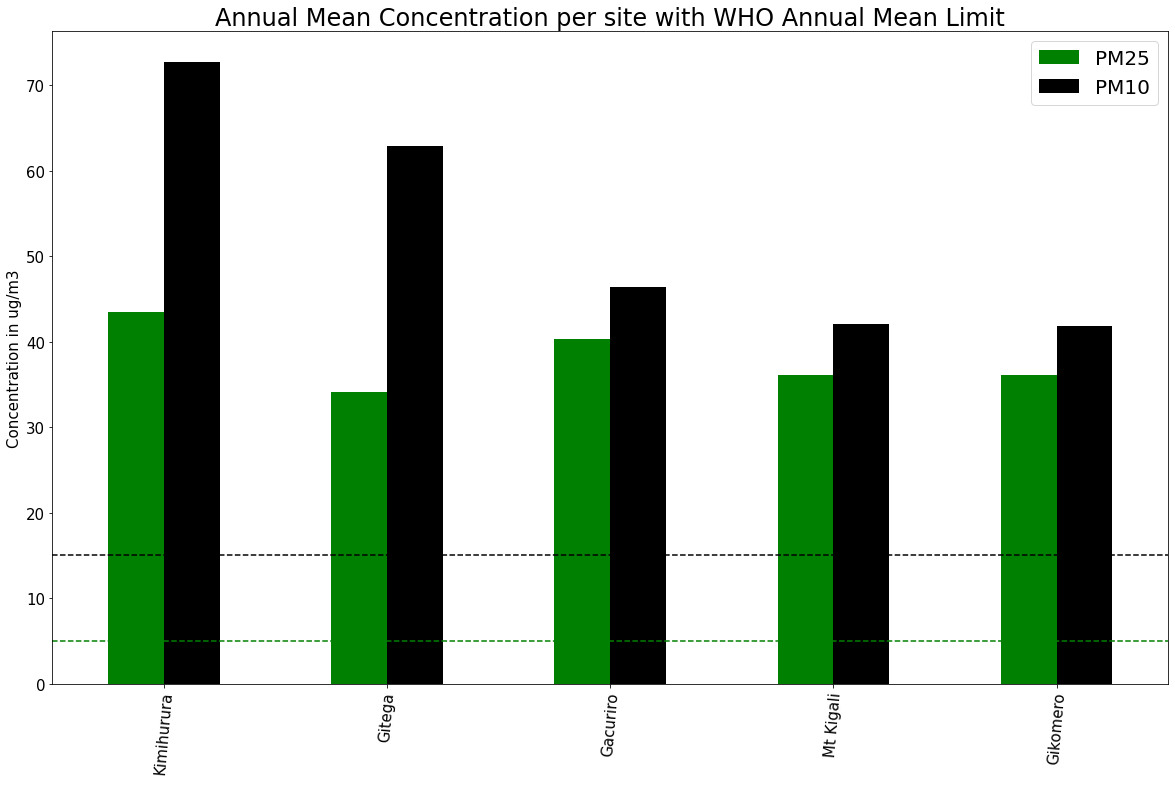

In [137]:
annual_mean_per_site(LCS_data_extracted,"site_name","PM25","PM10")

In [144]:
# Annual averages per site  for all pollutants
# Function for annual mean per site
def annual_mean_per_site_all(df,col1,col2,col3):
    df1=df.groupby(col1)[col2,col3].mean().sort_values(by=[col3],ascending=False)
    df2=df1.reset_index()
    print(df2.head())
    df2.plot(x=col1,y=[col2,col3],kind="bar",color=["green","black","yellow","blue"])
    plt.gcf().set_size_inches(20,12)
    plt.title("Annual Mean Concentration per site")
    plt.xticks(fontsize=15,rotation=85)
    plt.xlabel(" ")
    plt.yticks(fontsize=15)
    plt.ylabel("Particulate Matter Concentration in ug/m3",fontsize=15)
    plt.show()

    site_name       PM25       PM10
0  Kimihurura  43.435104  72.660929
1      Gitega  34.102649  62.922225
2    Gacuriro  40.272967  46.436414
3   Mt Kigali  36.095759  42.073479
4    Gikomero  36.052957  41.806266


/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3770318220.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(col1)[col2,col3].mean().sort_values(by=[col3],ascending=False)


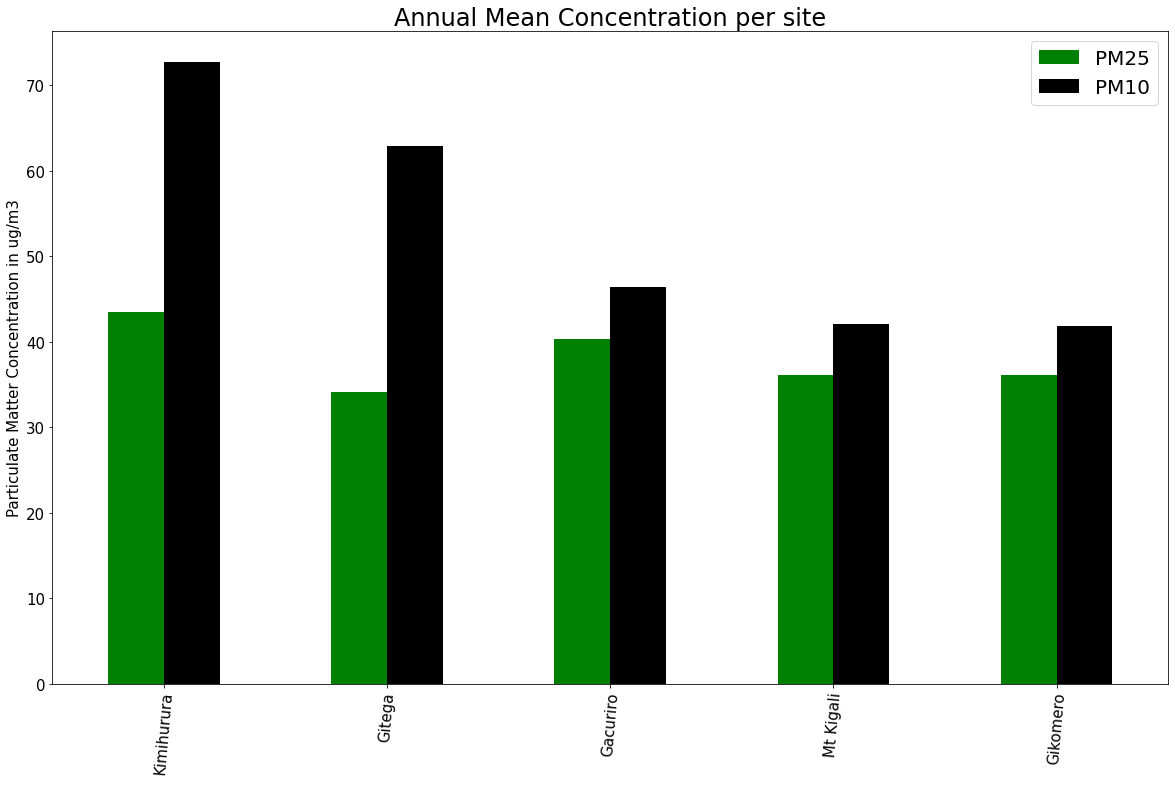

In [145]:
annual_mean_per_site_all(LCS_data_extracted,"site_name","PM25","PM10")

In [146]:
def mean_per_month (df,col1,col2,col3):
    # Annual Mean per site sorted by PM10 Conc
    df1=df.groupby(col1)[col2,col3].mean()
    df2=df1.reset_index()
    #Getting specific month Names    
    month_num={month: index for index, month in enumerate(calendar.month_abbr) if month}
    month_num
    # Swapping keys and values
    num_month = dict([(value, key) for key, value in month_num.items()])
    num_month
    # # February on overall had the highest pollution both coarse and fine
    df2['month_name'] = df2[col1].map(num_month)
    print(df2)
    #Plotting the results
    #Plotting PM 10 and 2.5 per month to determine month of interest.
    df2.plot(x="month_name", y=[col2,col3], kind="bar",color=["green","black","red","blue"])
    plt.gcf().set_size_inches(20, 12)
    plt.title("Average Pollutant concentration per Month")
    plt.xticks(fontsize=15,rotation=55)
    plt.xlabel(" ")
    plt.yticks(fontsize=15)
    plt.ylabel("Monthly Particulate Matter Concentration in ug/m3",fontsize=15)
    plt.show()

    month       PM25        PM10 month_name
0       1  46.749220   60.547507        Jan
1       2  49.664267   63.599031        Feb
2       3  34.691503   45.620656        Mar
3       4  29.605369   40.072809        Apr
4       5  31.179814   42.003768        May
5       6  37.308320  102.929772        Jun
6       7  44.899458   54.191403        Jul
7       8  43.295185   53.190130        Aug
8       9  40.166756   50.158068        Sep
9      10  34.883132   44.305418        Oct
10     11  30.619944   39.195912        Nov
11     12  32.593215   42.552947        Dec


/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/812583758.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(col1)[col2,col3].mean()


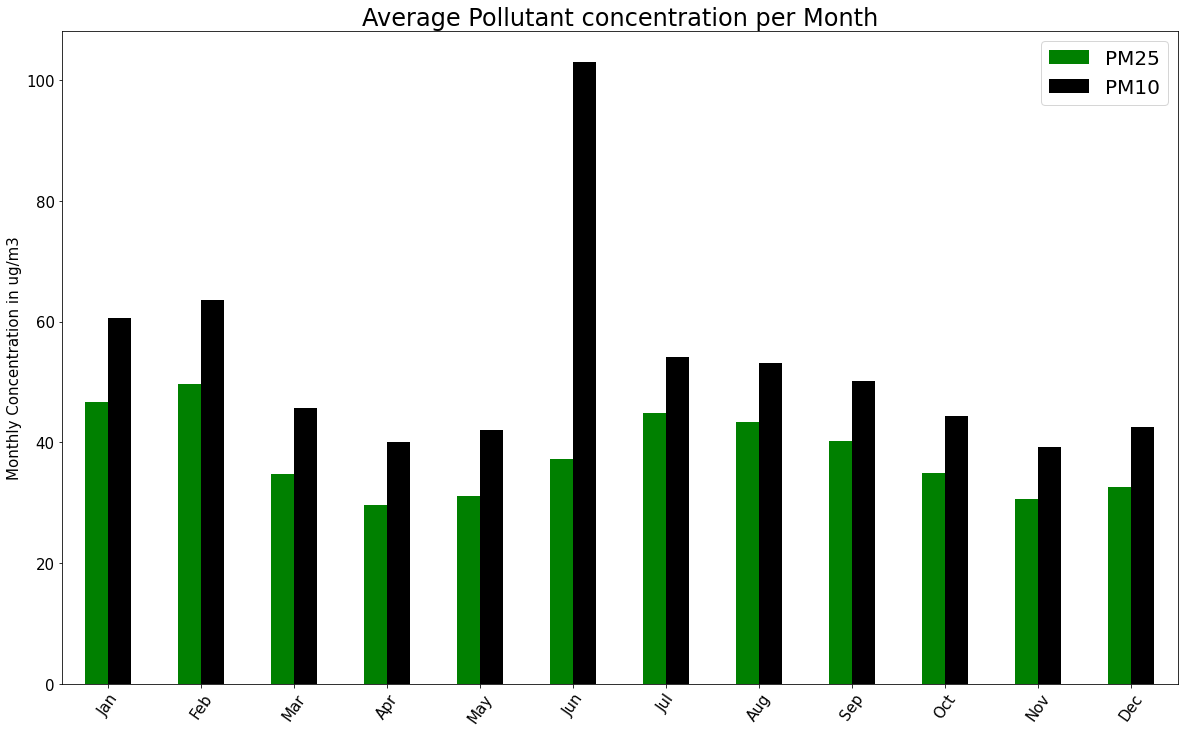

In [143]:
mean_per_month(LCS_data_extracted,"month","PM25","PM10")

#### Febraury seems to be the month with the highest pollutant level. 
#### It id however dependent on the pollutants

# Analysis per site

### This will give us an insight into the behavior of each pollutant in different sites over the entire monitoring period

### Objectives 
##### To understand the state of air quality in Kampala sites by 
* Reviewing the temporal variation of Particulate matter for the whole year, understanding duirnal patterns, weekday and weekend air quality.
* Correlation between PM 2.5 and PM 10 
* Assessing Missing values and anomalies (spikes in the set for both PM 2.5 and PM 10)

In [147]:
# Specifying the site names
def site_df(df,name:str):
    site_data=df[df['site_name']==name]
    return site_data

In [148]:
# Function to plot hourly concentrations over the entire year per site
def hourly_conc (df,col1,col2,col3,col4,col5,site_name):
    #get the site 
    df1=site_df(df,site_name)
    #setting timestamp as the index
    df2=df1.set_index(col1).dropna()
    #resampling per hour
    df3=df2.resample('60min')[col2,col3,col4,col5].mean()
    # Plotting a graph of hourly averages over the entire year
    fig, (ax0,ax1,ax2,ax3) = plt.subplots(4, 1, sharex=True, constrained_layout=True,figsize=(25,15))
    #PM2.5
    ax0.plot(df3.index.values,
            df3[col2],
            color='black',
            label='PM 2.5 Concentration')   
    ax0.set(ylabel= f"Concentrations in ug/m3",
            title=f"Hourly PM2.5 Concentrations in {site_name} over the entire year")
    ax0.legend(loc="upper right")
    ax0.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # PM10
    ax1.plot(df3.index.values,
            df3[col3],
            color='green',
            label='PM 10 Concentration')   
    ax1.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Hourly PM10 Concentrations in {site_name} over the entire year")
    ax1.legend(loc="upper right")
    ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # Ozone
    ax2.plot(df3.index.values,
            df3[col4],
            color='purple',
            label='Ozone Concentration')   
    ax2.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Hourly Ozone Concentrations in {site_name} over the entire year")
    ax2.legend(loc="upper right")
    # CO
    ax3.plot(df3.index.values,
            df3[col5],
            color='blue',
            label='CO Concentration')   
    ax3.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Hourly CO Concentrations in {site_name} over the entire year")
    ax3.legend(loc="upper right")
    ax3.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show()   

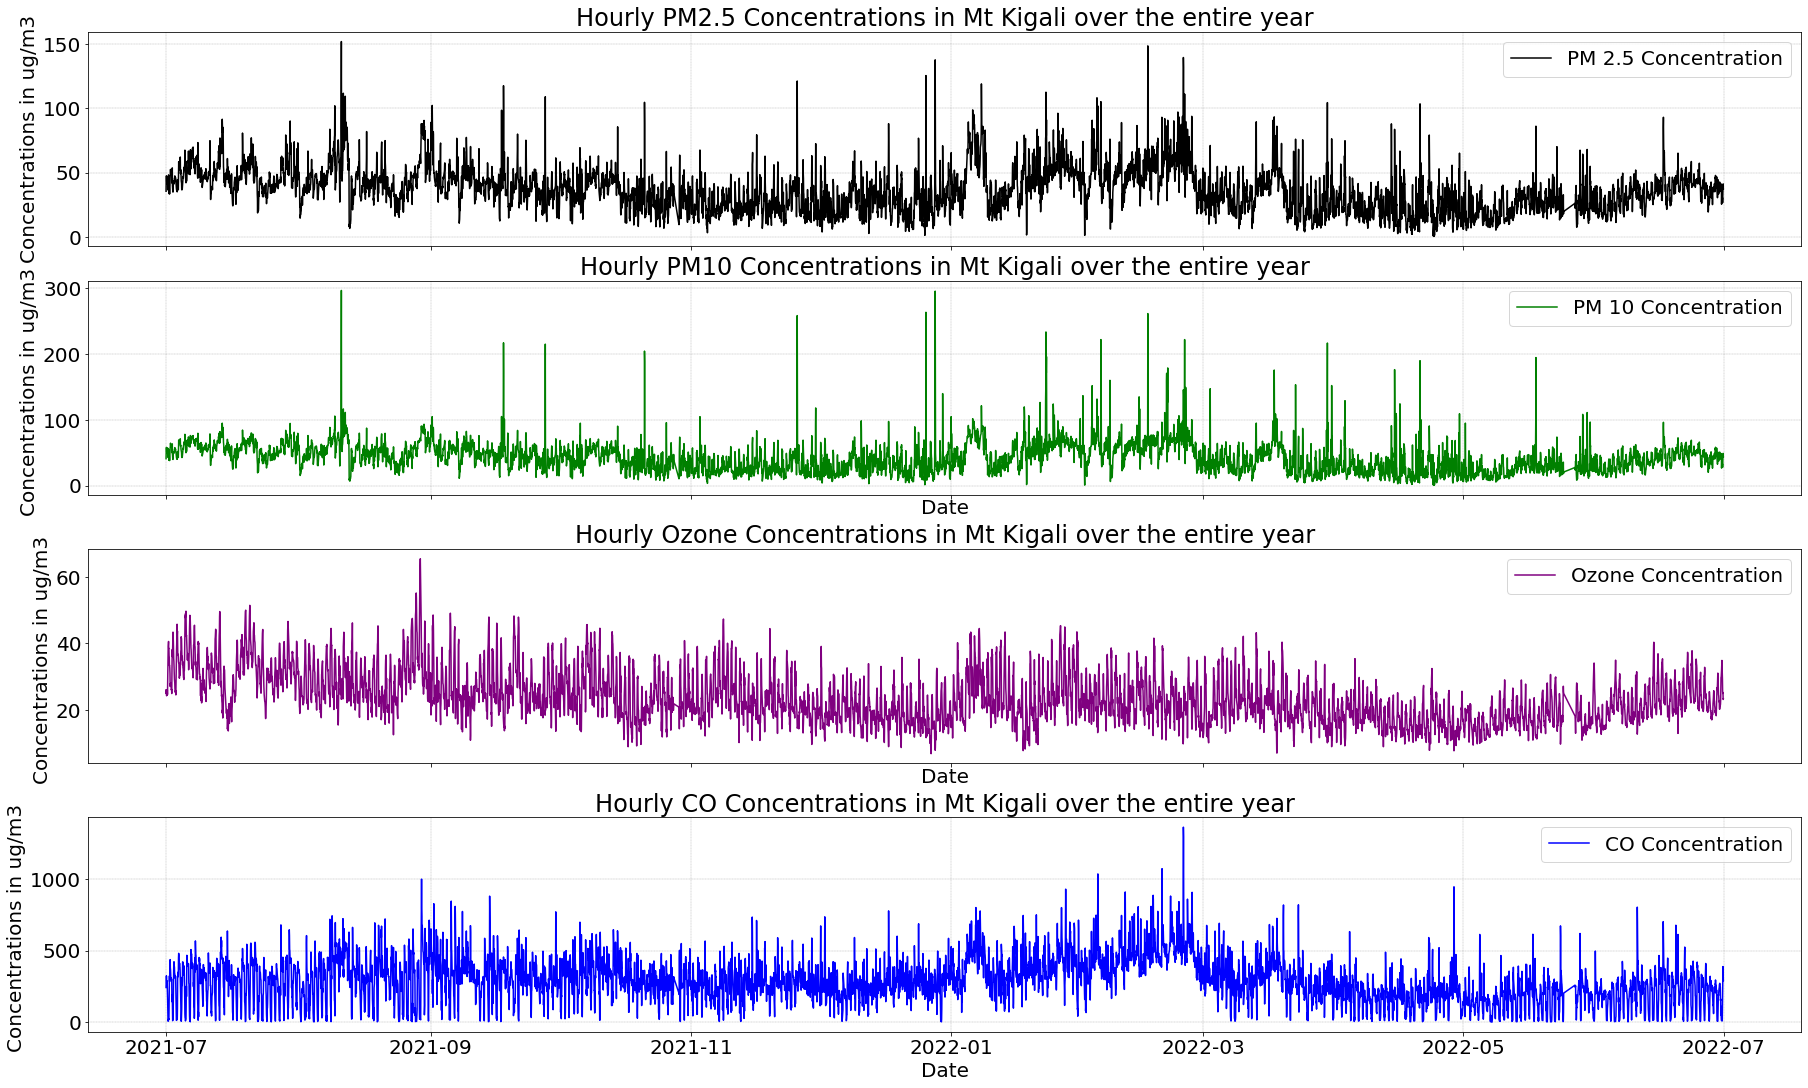

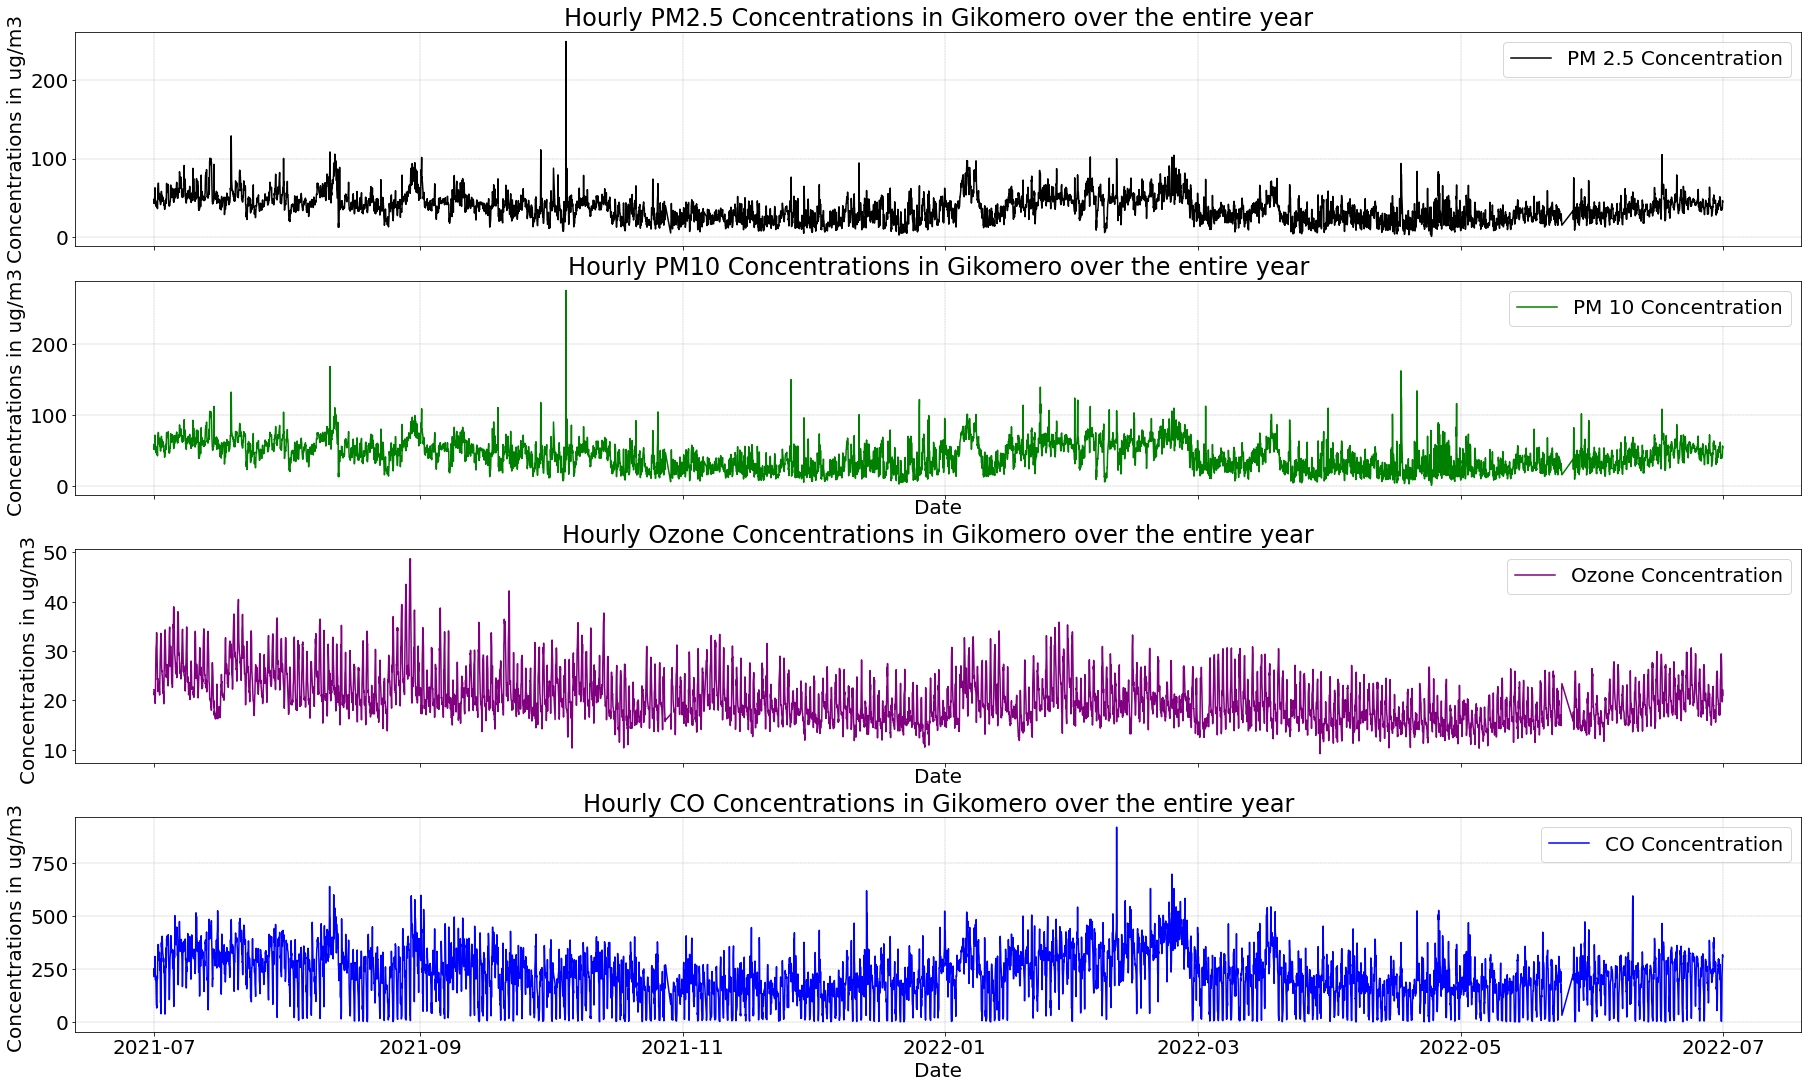

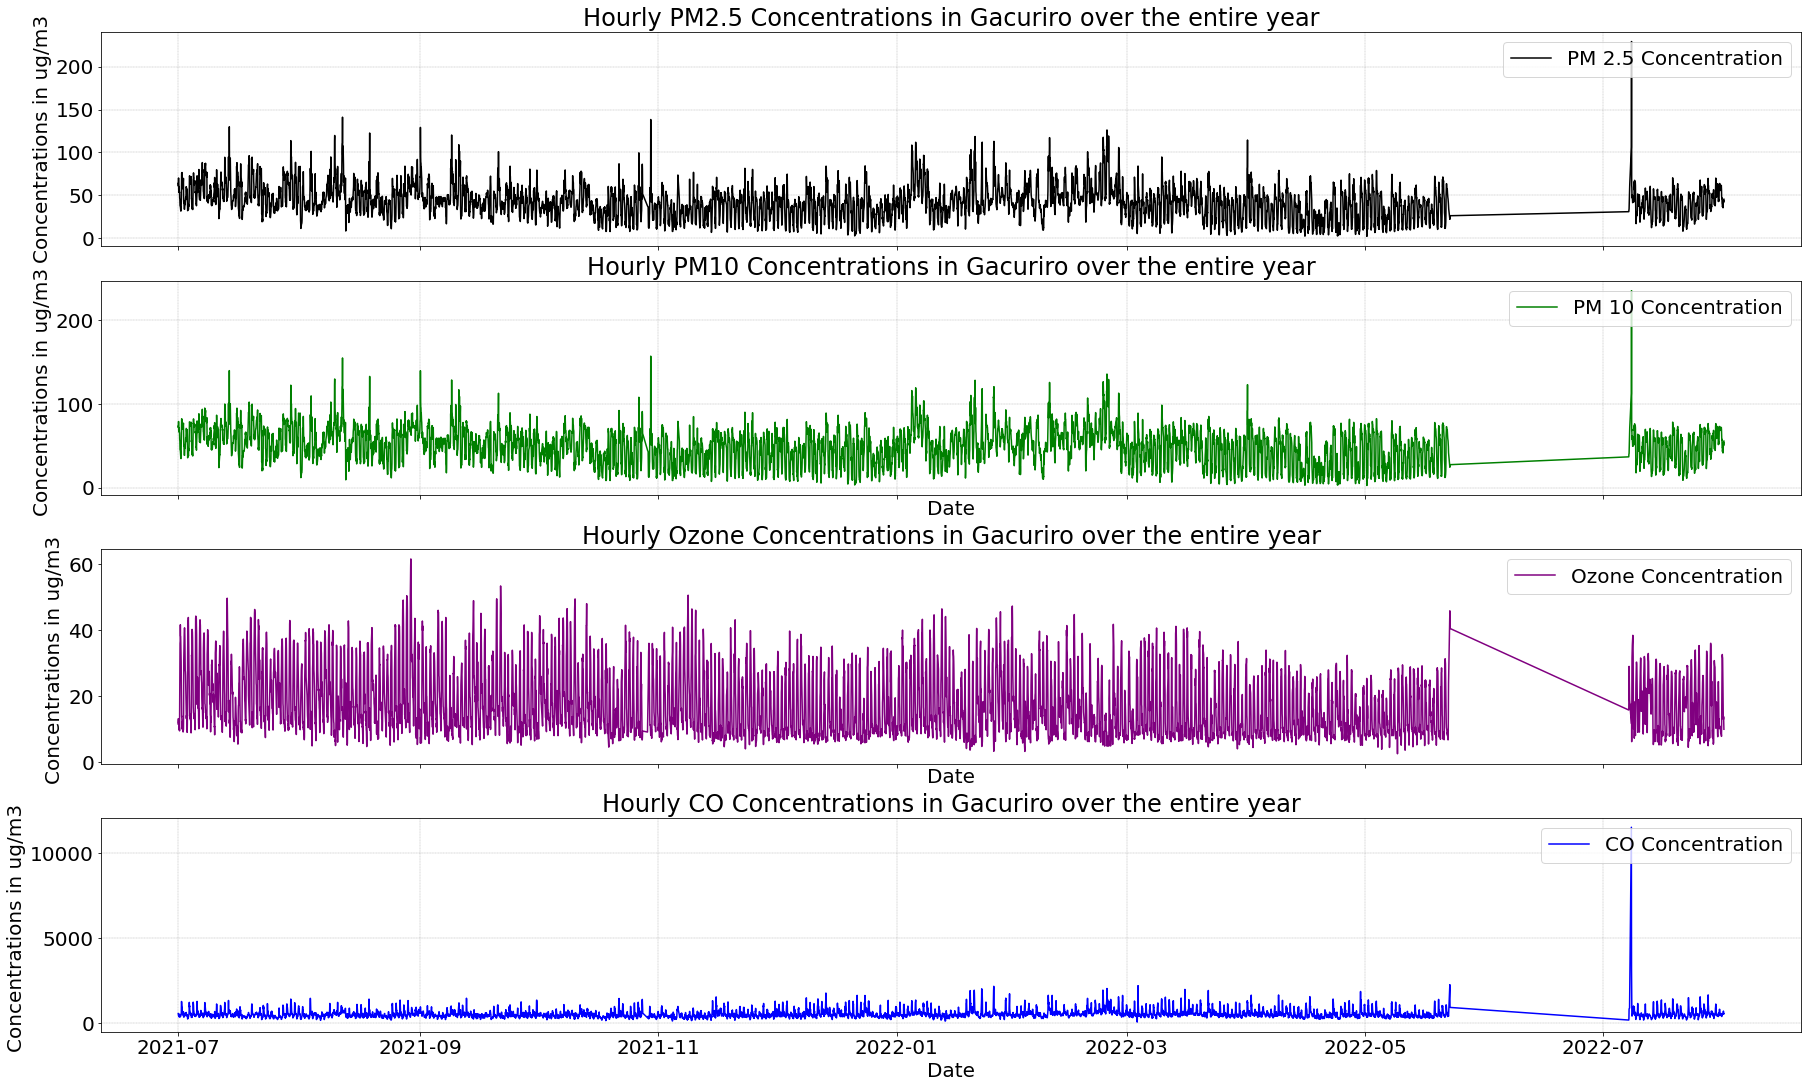

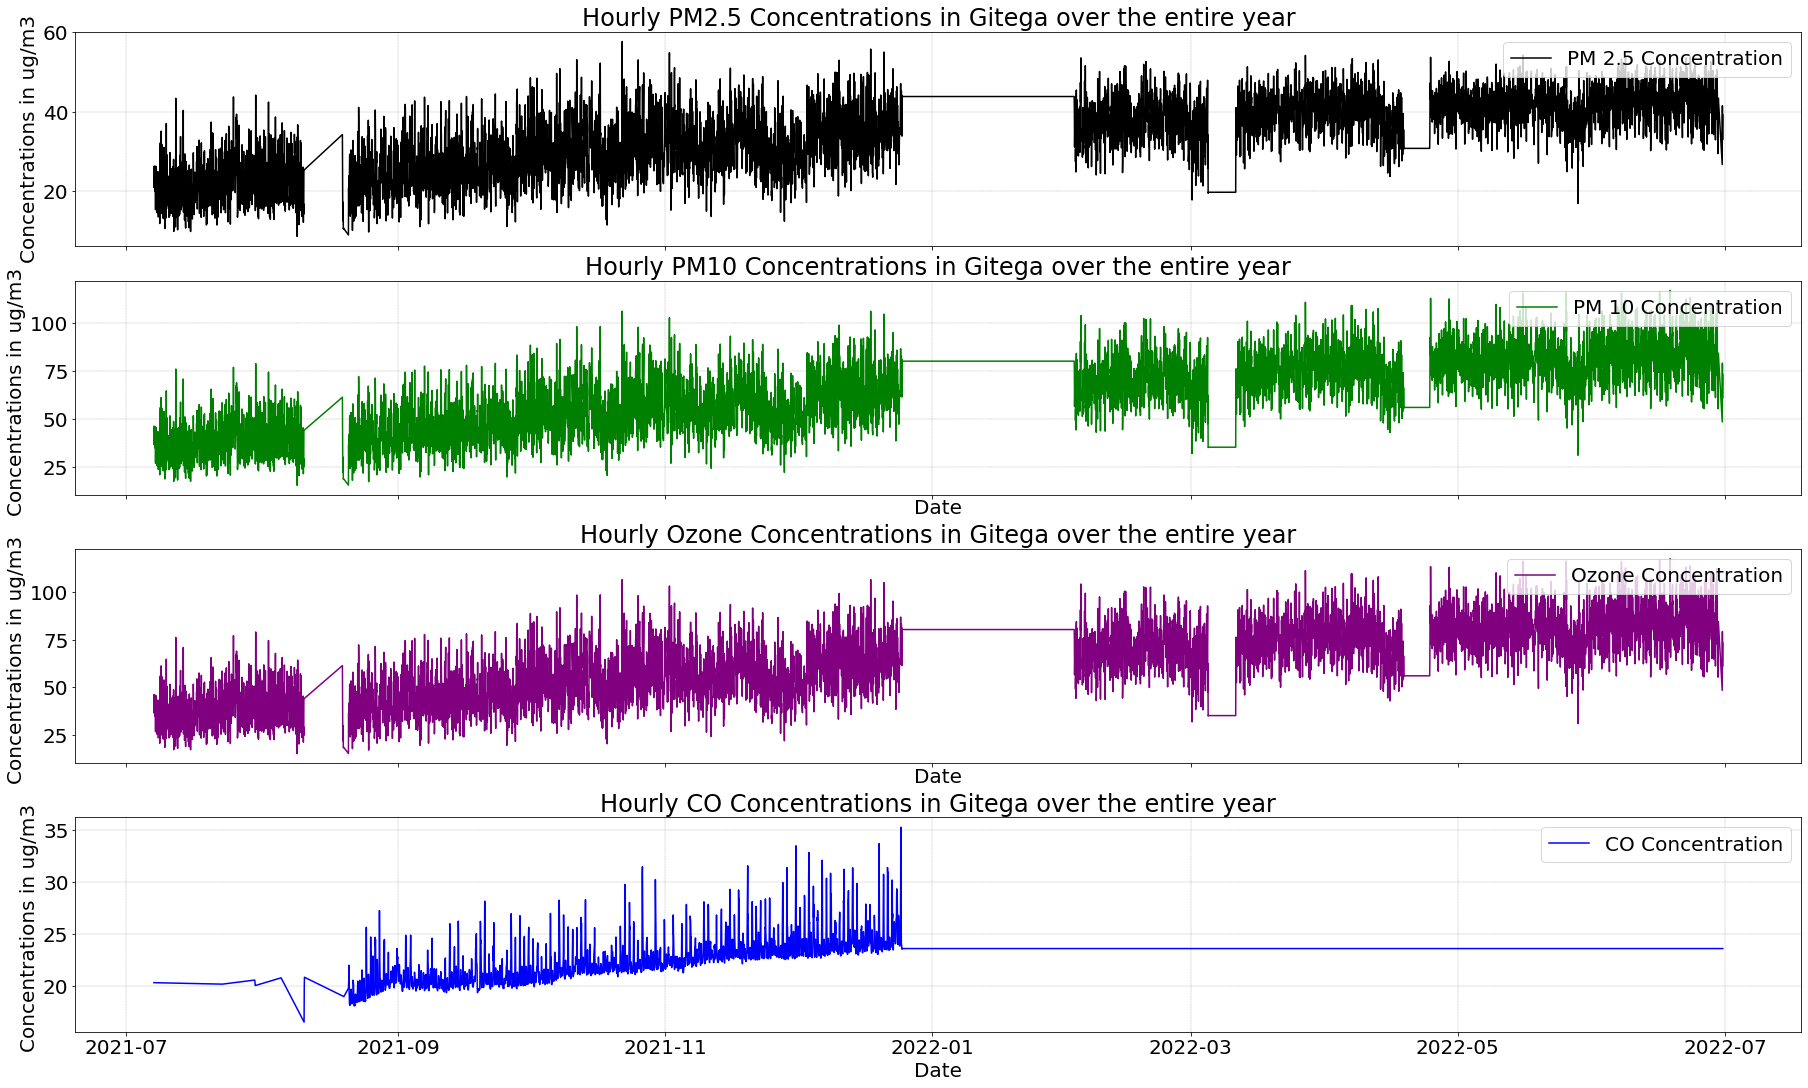

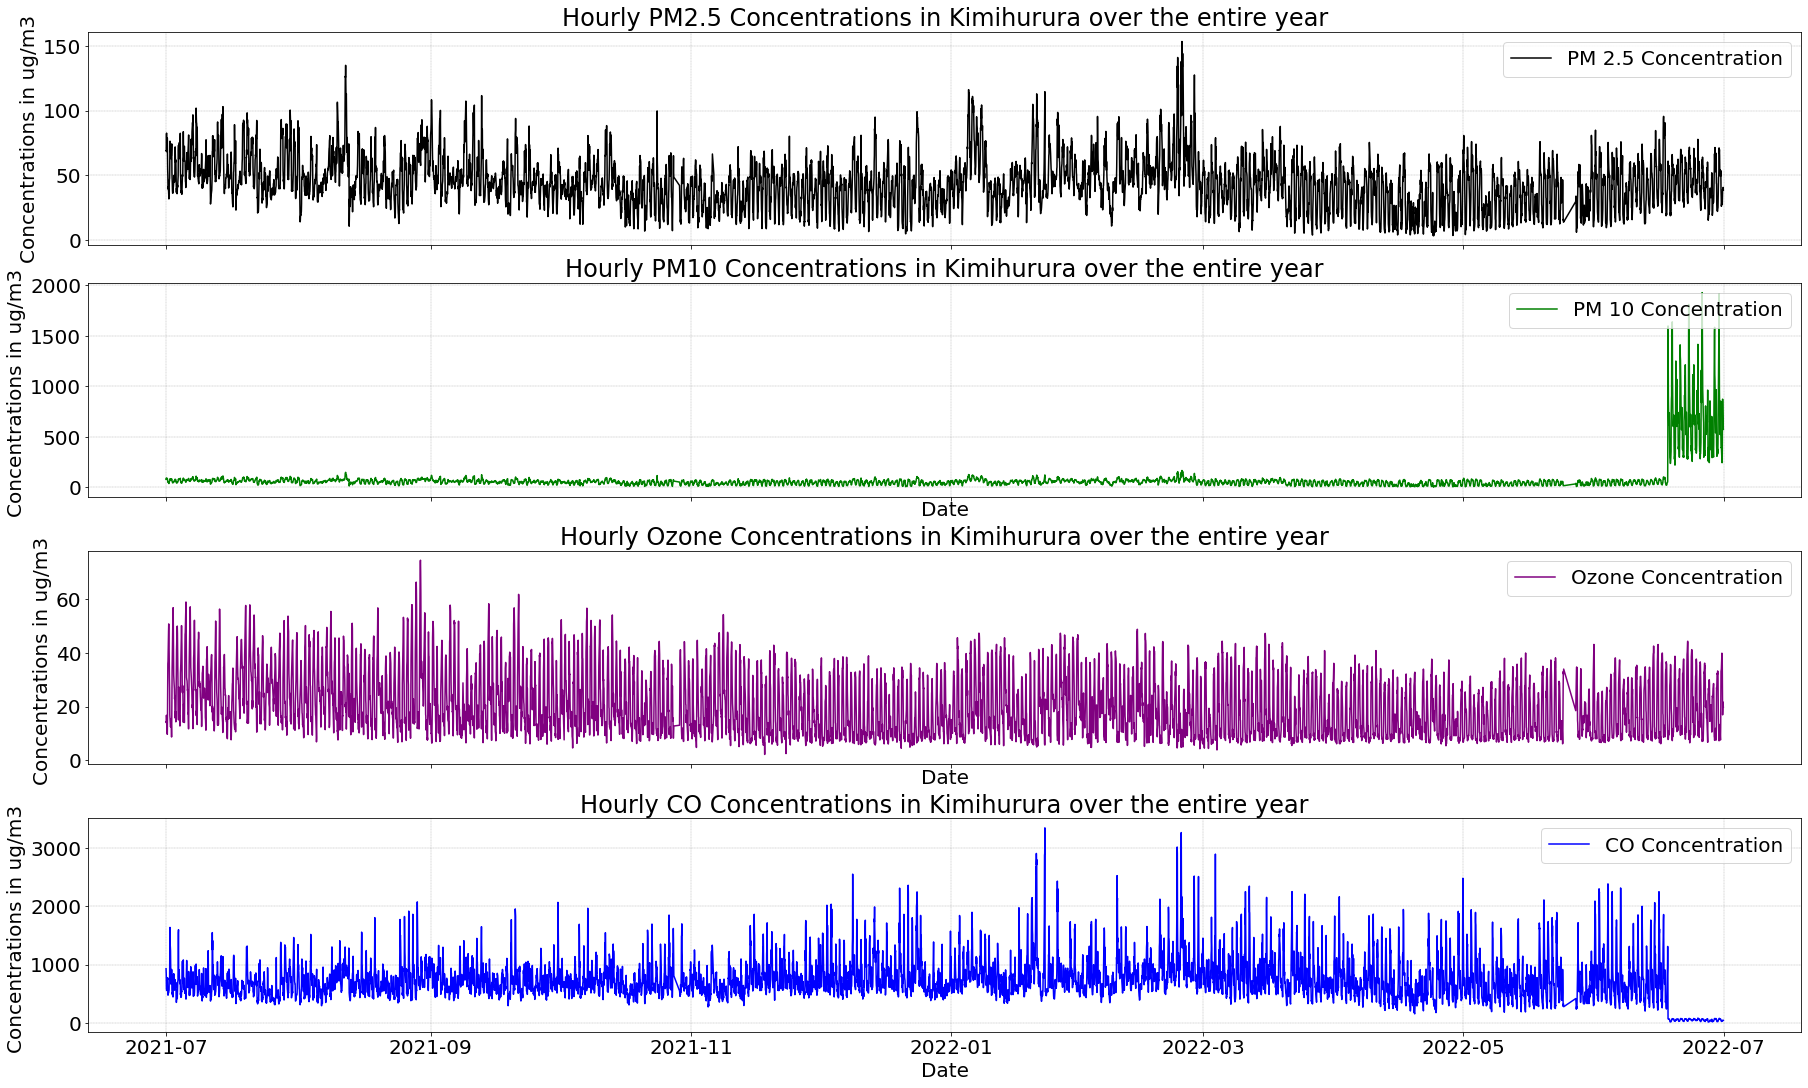

In [149]:
# Hourly concentraions for all sites
for i in LCS_data_extracted['site_name'].unique():
    hourly_conc(LCS_data_extracted,"timestamp","PM25","PM10","O3","CO",i)


# Diurnal Patterns

In [152]:
# A function for Hourly hour per month
def duirnal_patterns(df,site_name):
    df1=site_df(df,site_name)  
#     month_df=df[df['month']==month_digit]
    hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()
    # Plotting hourly average over the entire monitoring period
    # Plotting a graph of hourly averages
    fig,ax=plt.subplots(figsize=(25,10))
    #PM2.5
    ax.plot(hourly_avg.index.values,
            hourly_avg['PM25'],
            color='black',
            label=f'PM 2.5 Conc')   
    # PM10
    ax.plot(hourly_avg.index.values,
            hourly_avg['PM10'],
            color='green',
            label=f'PM 10 Conc') 
#     ax.plot(hourly_avg.index.values,
#             hourly_avg['O3'],
#             color='purple',
#             label=f'Ozone Conc')   
#     ax.plot(hourly_avg.index.values,
#             hourly_avg['CO'],
#             color='blue',
#             label=f'CO Conc')     
    ax.set(xlabel="Hour of the Day",
               ylabel= f"Particulate Matter Pollutant Concentrations",
               title=f"Duirnal Patterns in {site_name}")
    plt.legend()
    plt.xticks(hourly_avg.index.values)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show() 

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3502484354.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()


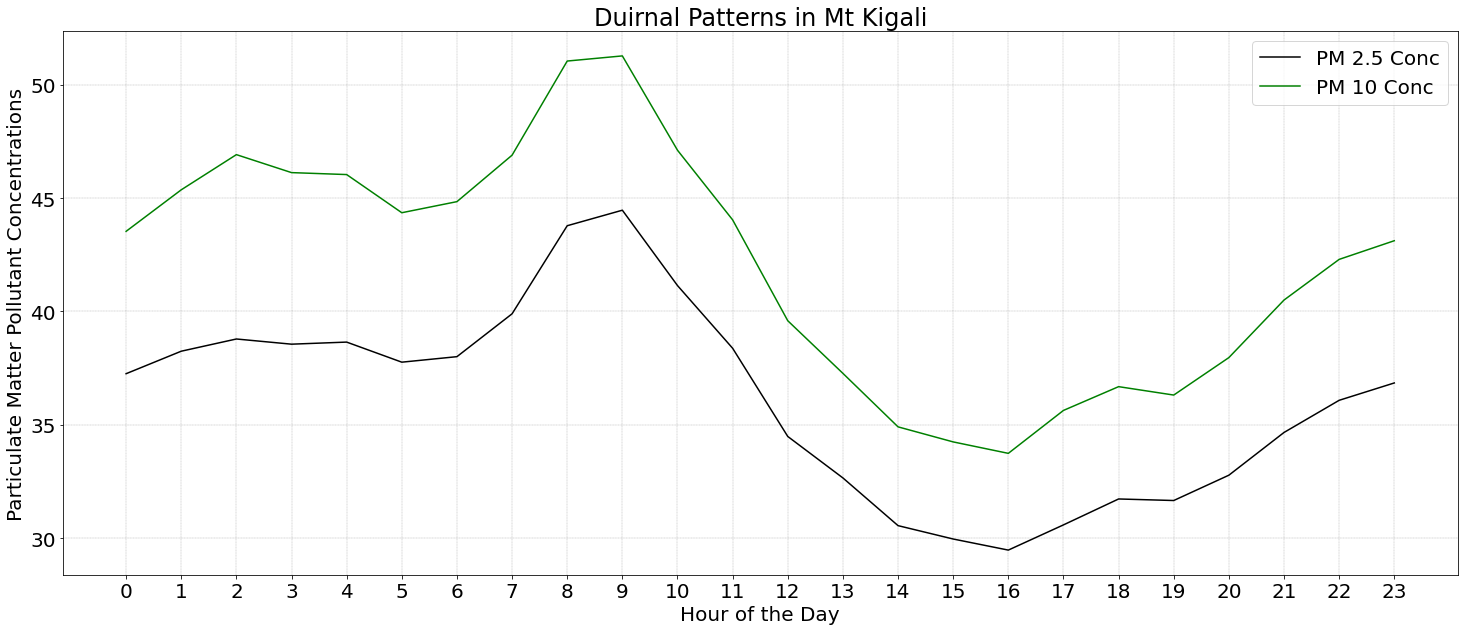

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3502484354.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()


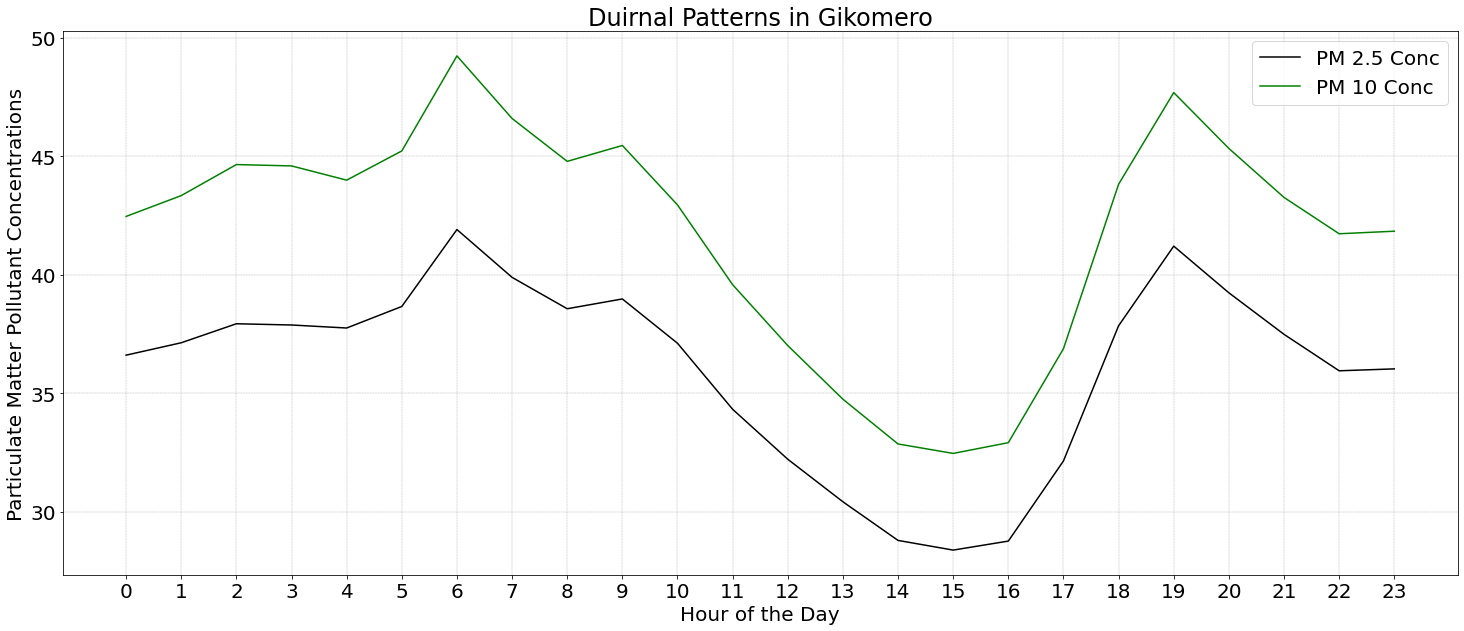

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3502484354.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()


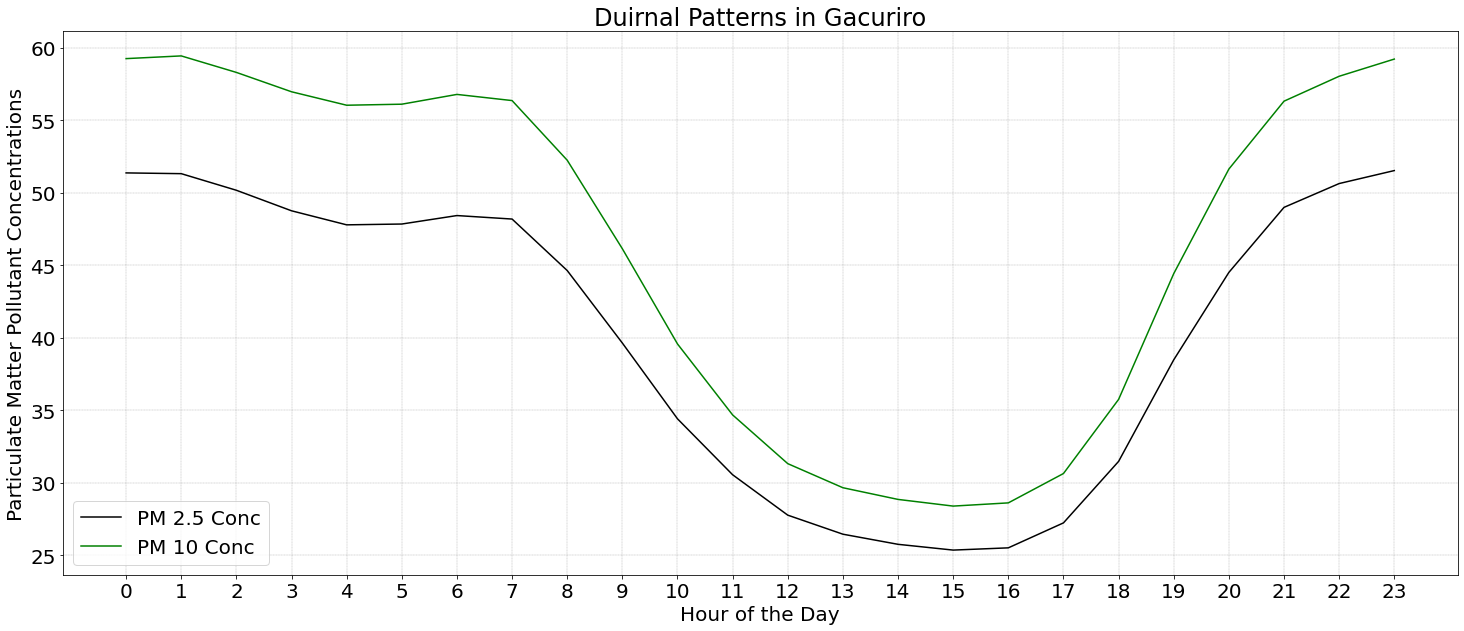

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3502484354.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()


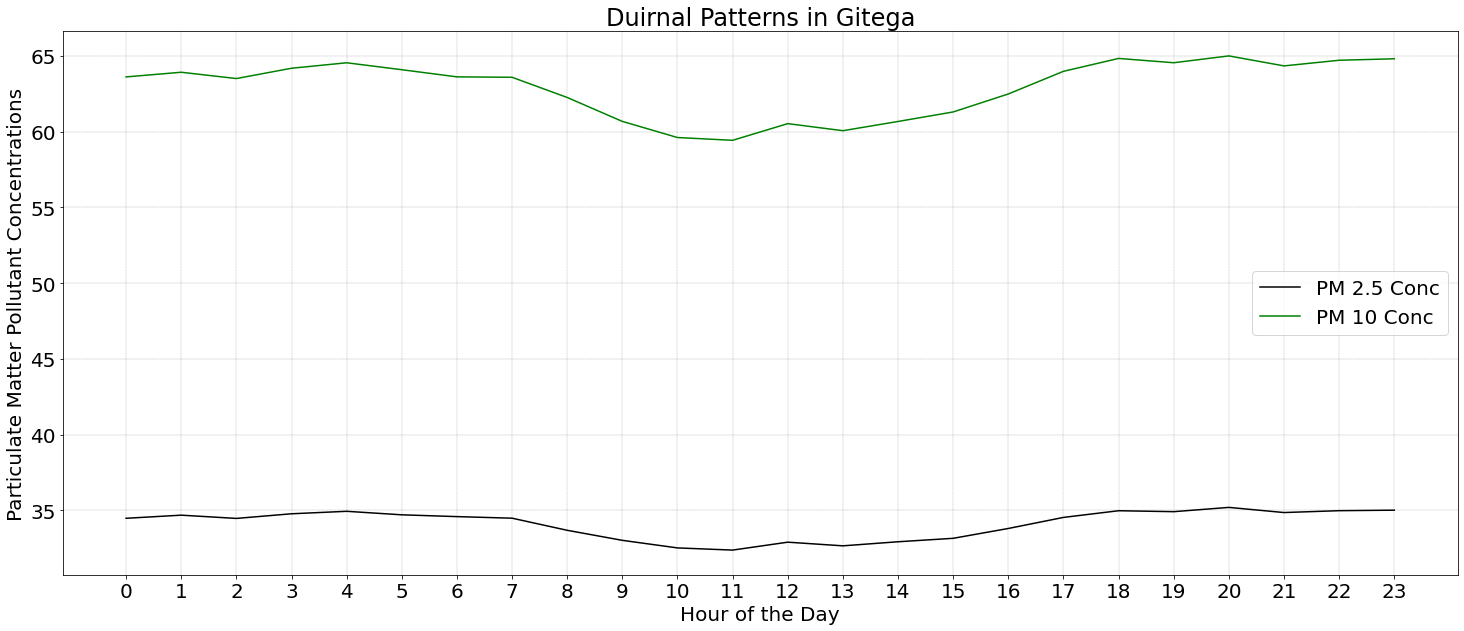

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3502484354.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg=df1.groupby('hour')["PM25","PM10"].mean()


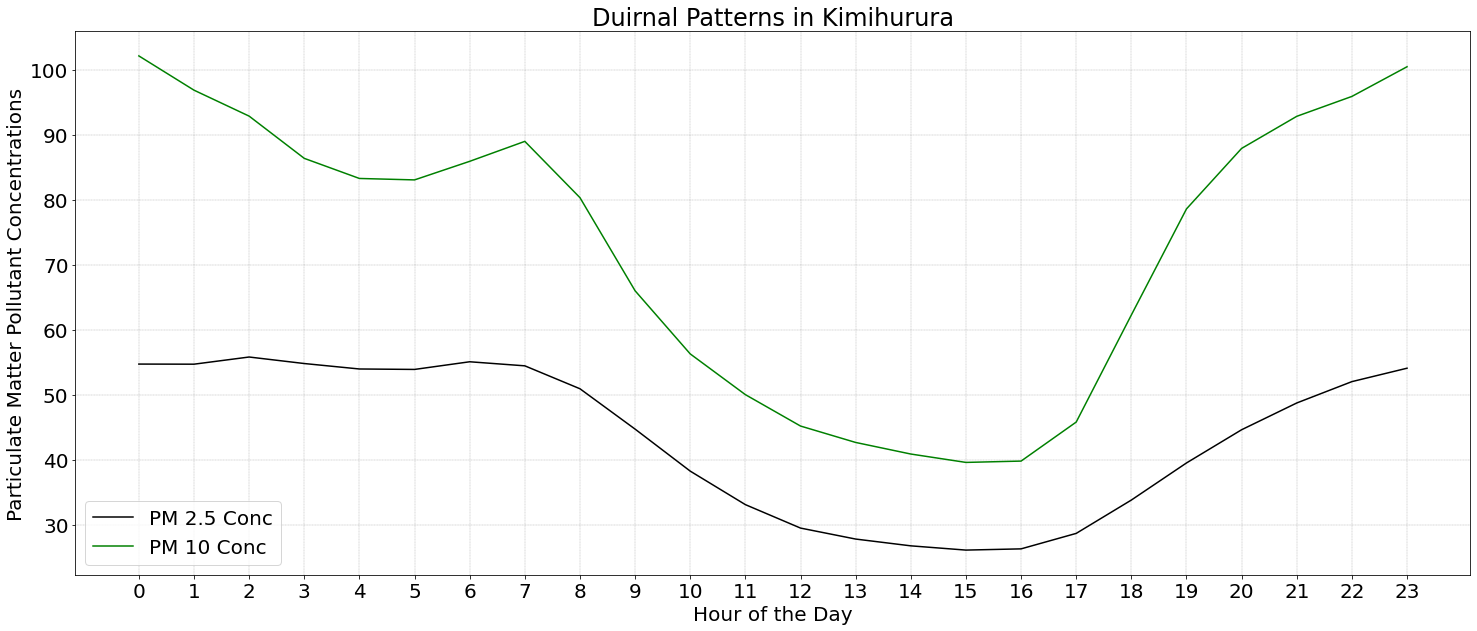

In [153]:
# duirnal patterns per site
for i in LCS_data_extracted['site_name'].unique():
    duirnal_patterns(LCS_data_extracted,i)

# Weekdays vs Weekends

In [78]:
# Select data frame where weekday is True 
def weekdays_weekend(df,site_name):
    weekday_df=df[(df['weekday_weekend']==1) & (df["site_name"]==site_name)]
    weekday_df.head()
    #Getting the mean over the hour for weekdays
    hourly_average_weekday_df=weekday_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
    hourly_average_weekday_df.head()
    # Select data frame where weekday is False 
    weekend_df=df[(df['weekday_weekend']==0) & (df["site_name"]==site_name)]
    weekend_df.head()
    hourly_average_weekend_df=weekend_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
    hourly_average_weekend_df.head()

    # Plotting a graph of duirnal patterns over the entire year
    #PM2.5
    plt.subplots(figsize=(40,15))
    plt.suptitle(f"Comparison of Duirnal patterns over Weekdays and Weekends in {site_name}",fontsize=40)
    plt.subplot(1,2,1)
    plt.plot(hourly_average_weekday_df.index.values,
            hourly_average_weekday_df['PM25'],
            color='black',
            label='Hourly Average PM 2.5 Conc')   
    # PM10
    plt.plot(hourly_average_weekday_df.index.values,
            hourly_average_weekday_df['PM10'],
            color='green',
            label='Average PM10 Conc')
    #Ozone
    plt.plot(hourly_average_weekday_df.index.values,
            hourly_average_weekday_df['O3'],
            color='purple',
            label='Average Ozone Conc')   
    #Carbon monoxide
    plt.plot(hourly_average_weekday_df.index.values,
            hourly_average_weekday_df['CO'],
            color='blue',
            label='Average CO Conc') 
    plt.xlabel("Hour of the day")
    plt.ylabel(f"Weekdays") 
    plt.legend()
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # Subplot on the left
    plt.subplot(1,2,2)
    #PM2.5
    plt.plot(hourly_average_weekend_df.index.values,
            hourly_average_weekend_df['PM25'],
            color='black',
            label='Average PM 2.5 Conc')   
    # PM10
    plt.plot(hourly_average_weekend_df.index.values,
            hourly_average_weekend_df['PM10'],
            color='green',
            label='Average PM10 Conc ')  
    #Ozone 
    plt.plot(hourly_average_weekend_df.index.values,
            hourly_average_weekend_df['O3'],
            color='purple',
            label='Average Ozone Conc ')  
    #CO
    plt.plot(hourly_average_weekend_df.index.values,
            hourly_average_weekend_df['CO'],
            color='blue',
            label='Average CO Conc ')  
    plt.xlabel("Hour of the day")
    plt.ylabel(f"Weekends") 
    plt.legend()
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show() 

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekday_df=weekday_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekend_df=weekend_df.groupby('hour')["PM25","PM10","O3","CO"].mean()


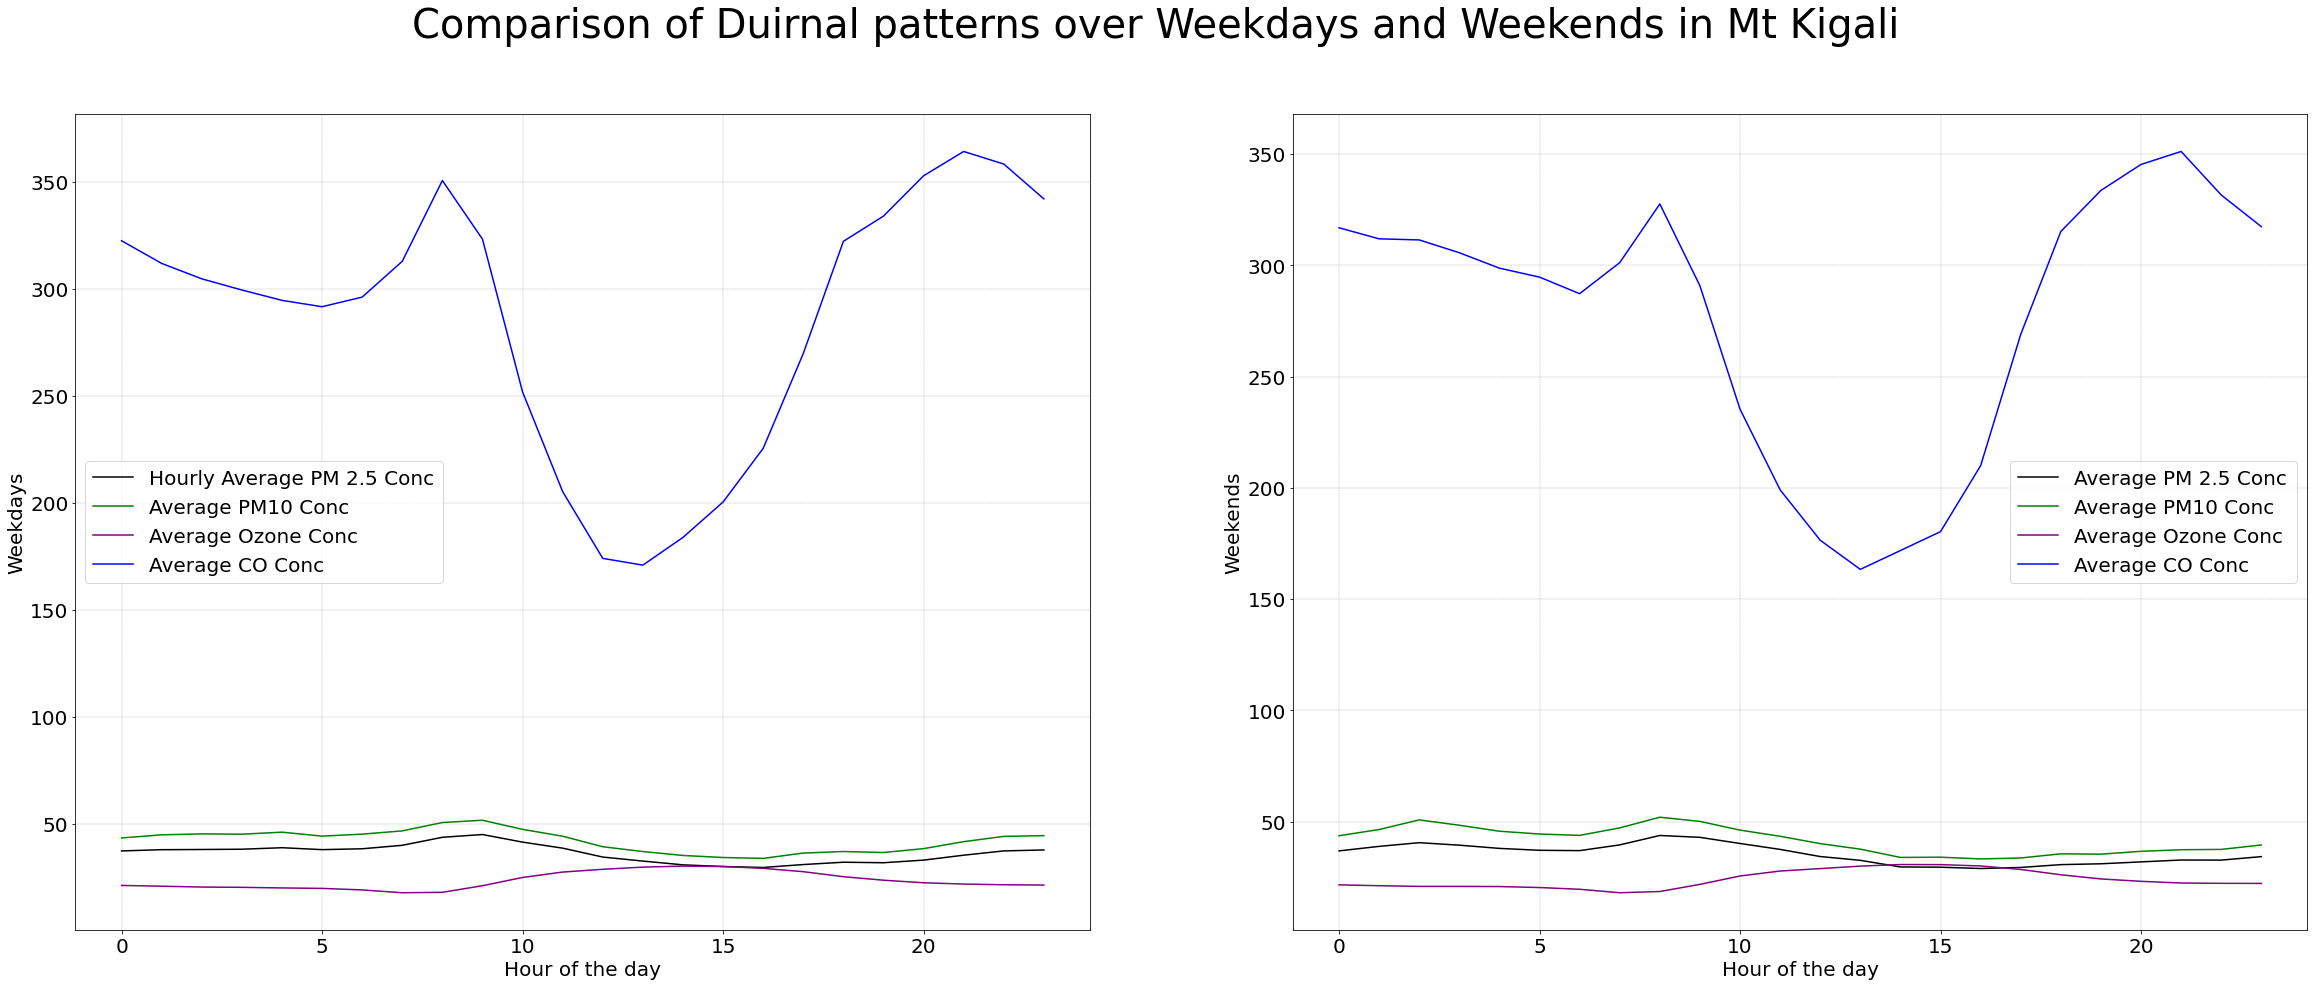

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekday_df=weekday_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekend_df=weekend_df.groupby('hour')["PM25","PM10","O3","CO"].mean()


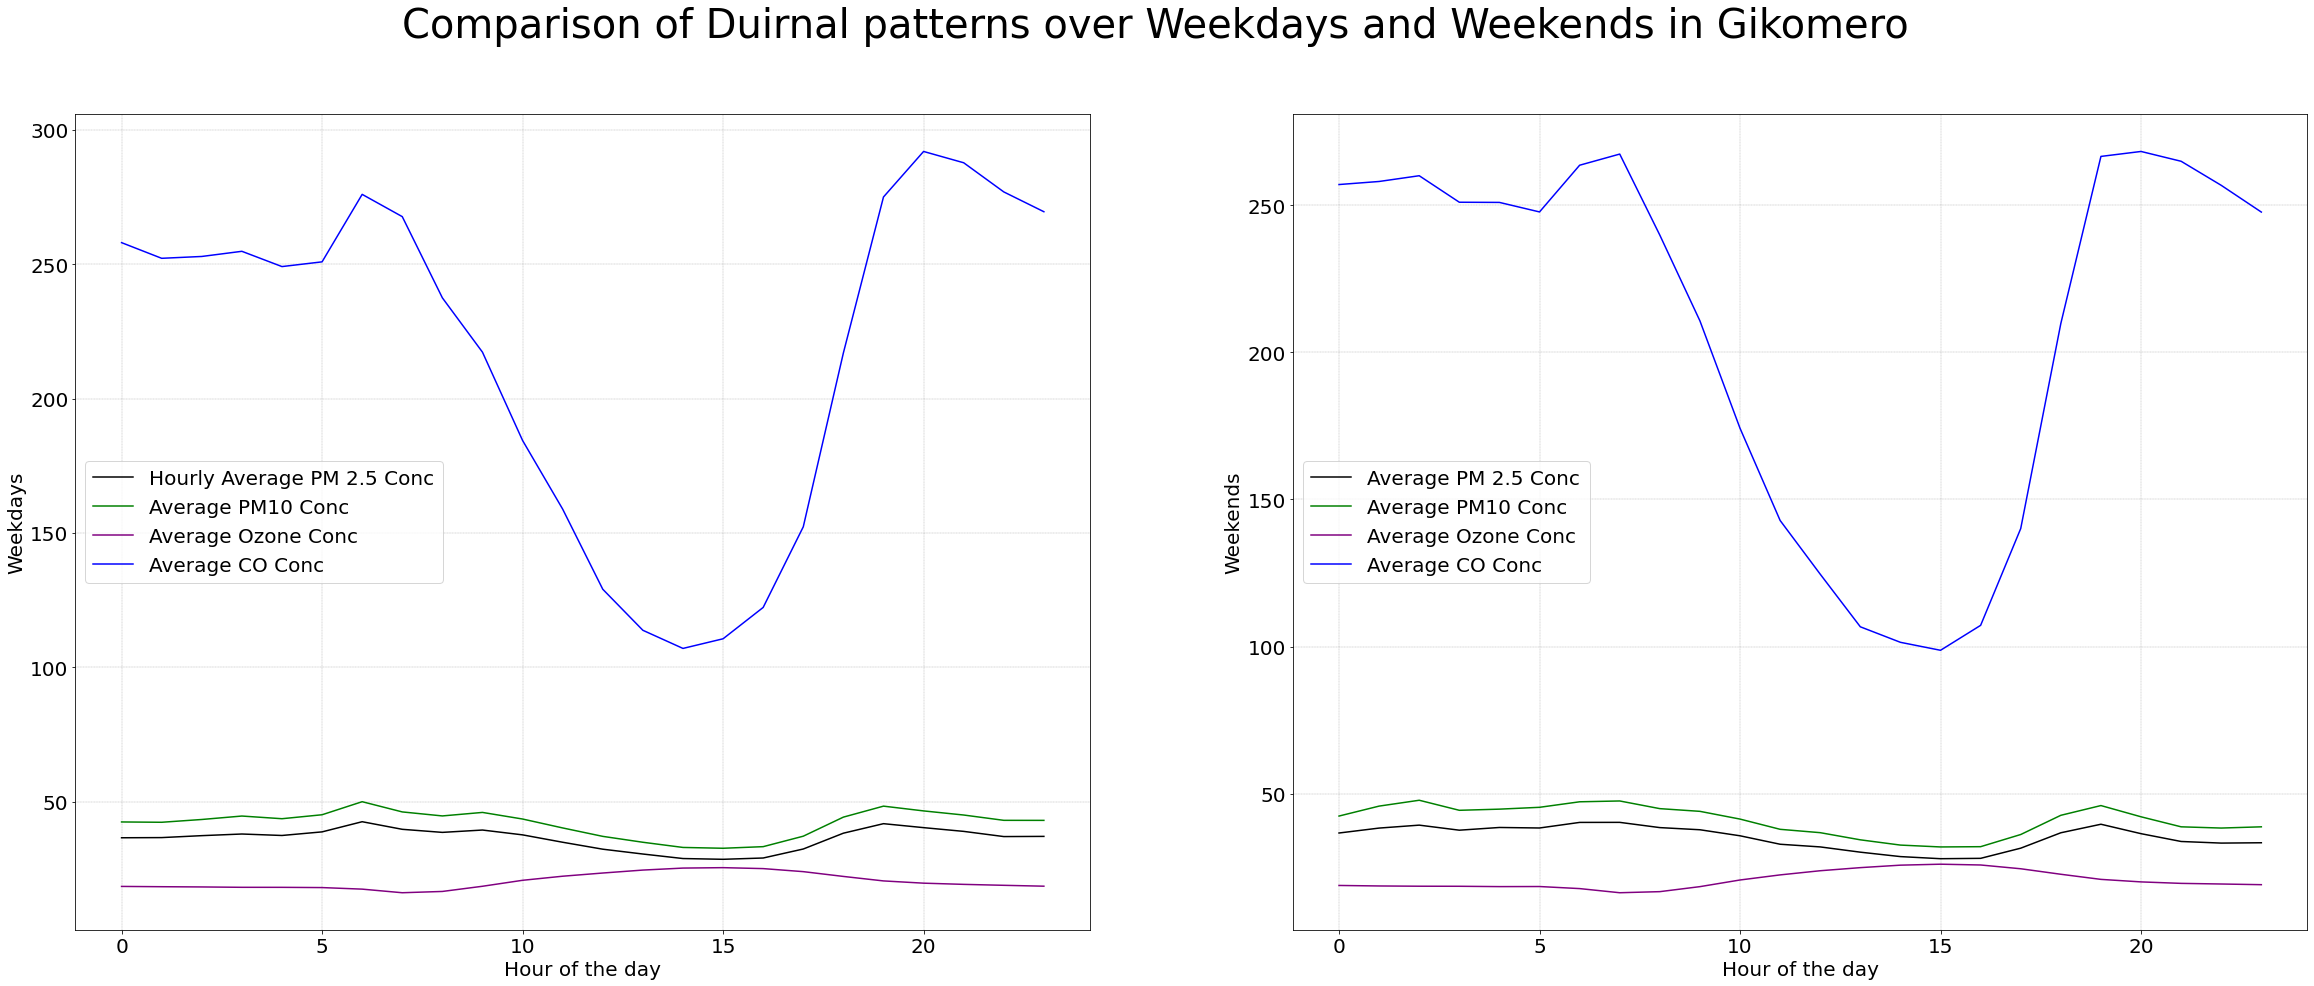

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekday_df=weekday_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekend_df=weekend_df.groupby('hour')["PM25","PM10","O3","CO"].mean()


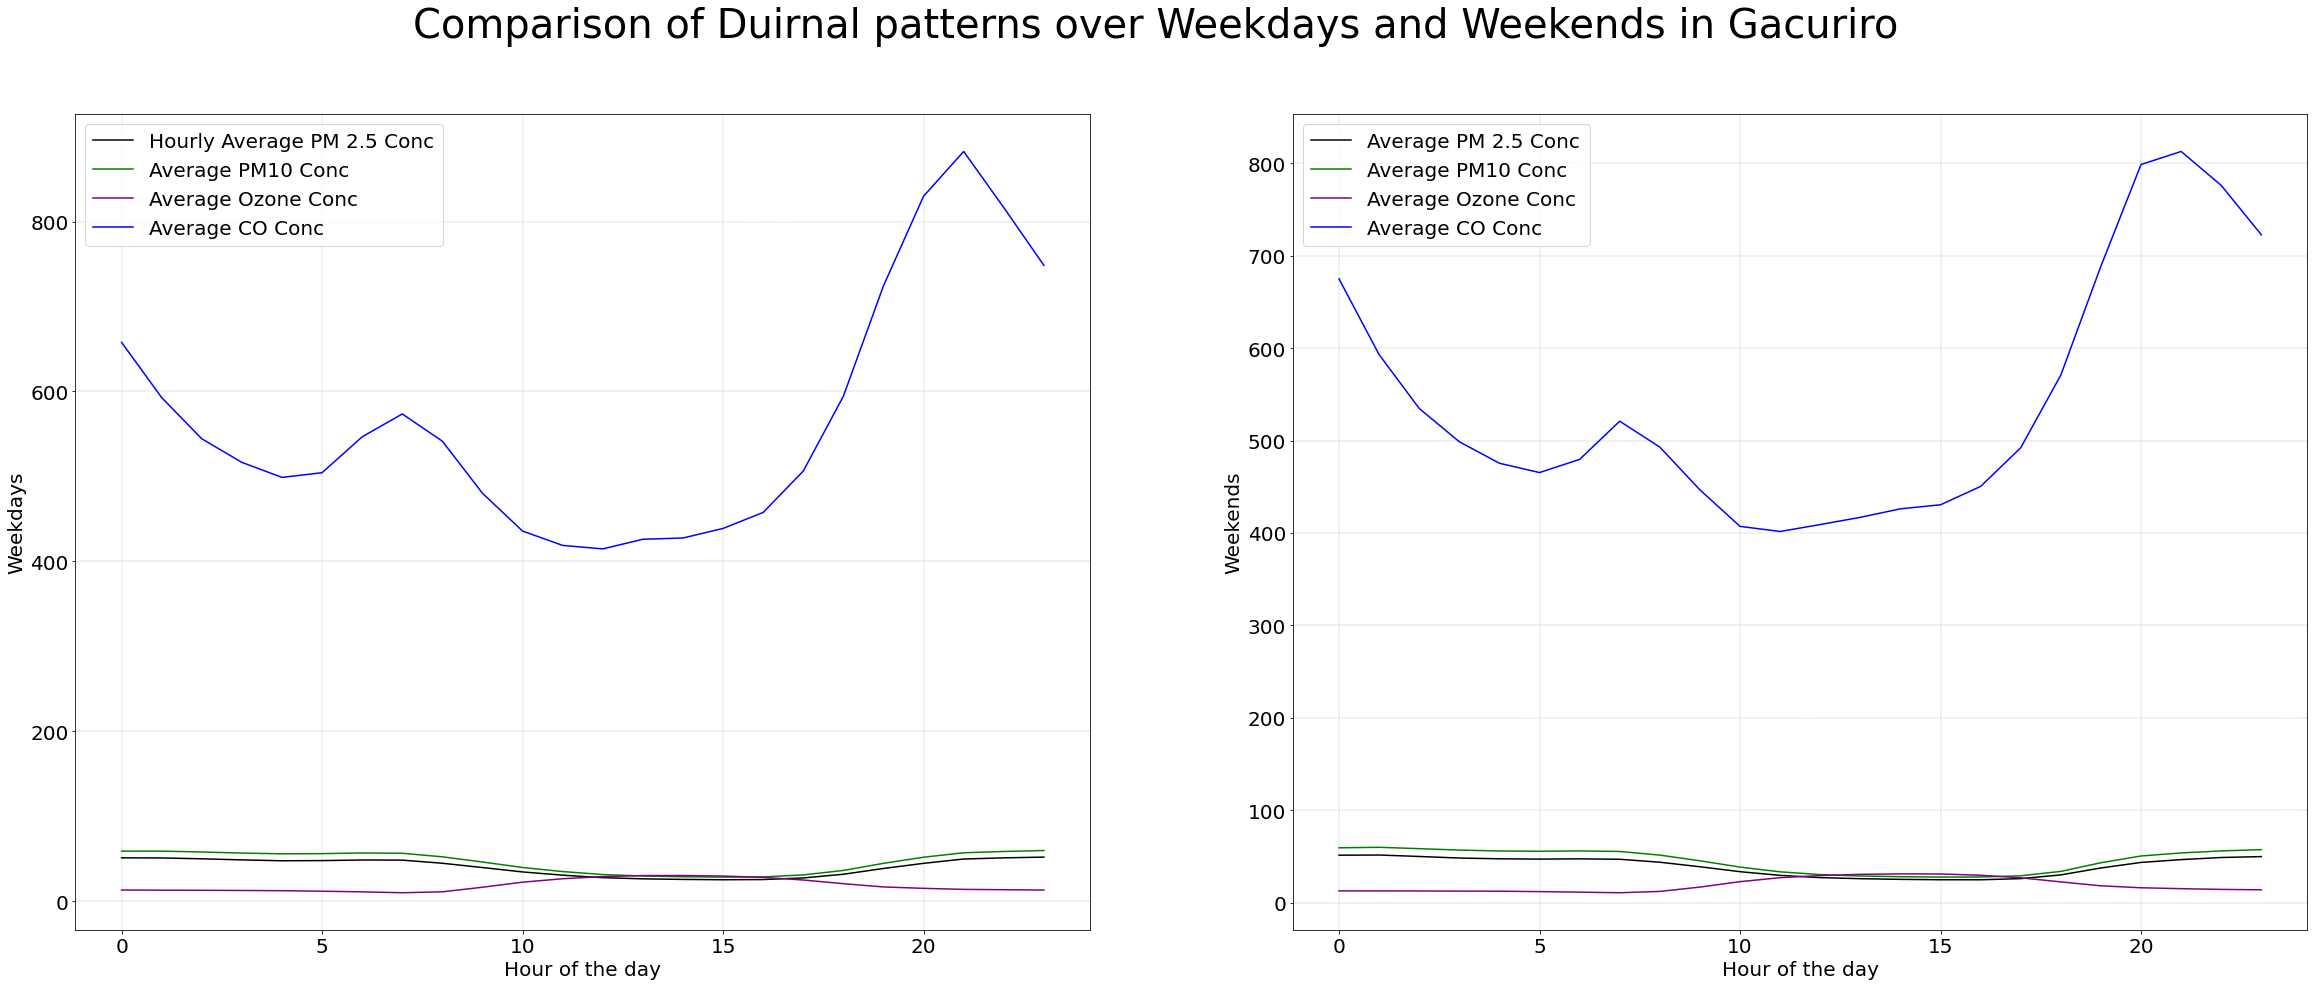

/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekday_df=weekday_df.groupby('hour')["PM25","PM10","O3","CO"].mean()
/var/folders/bx/hv5n07d907v5njq13q00z2880000gq/T/ipykernel_12461/3318128111.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_average_weekend_df=weekend_df.groupby('hour')["PM25","PM10","O3","CO"].mean()


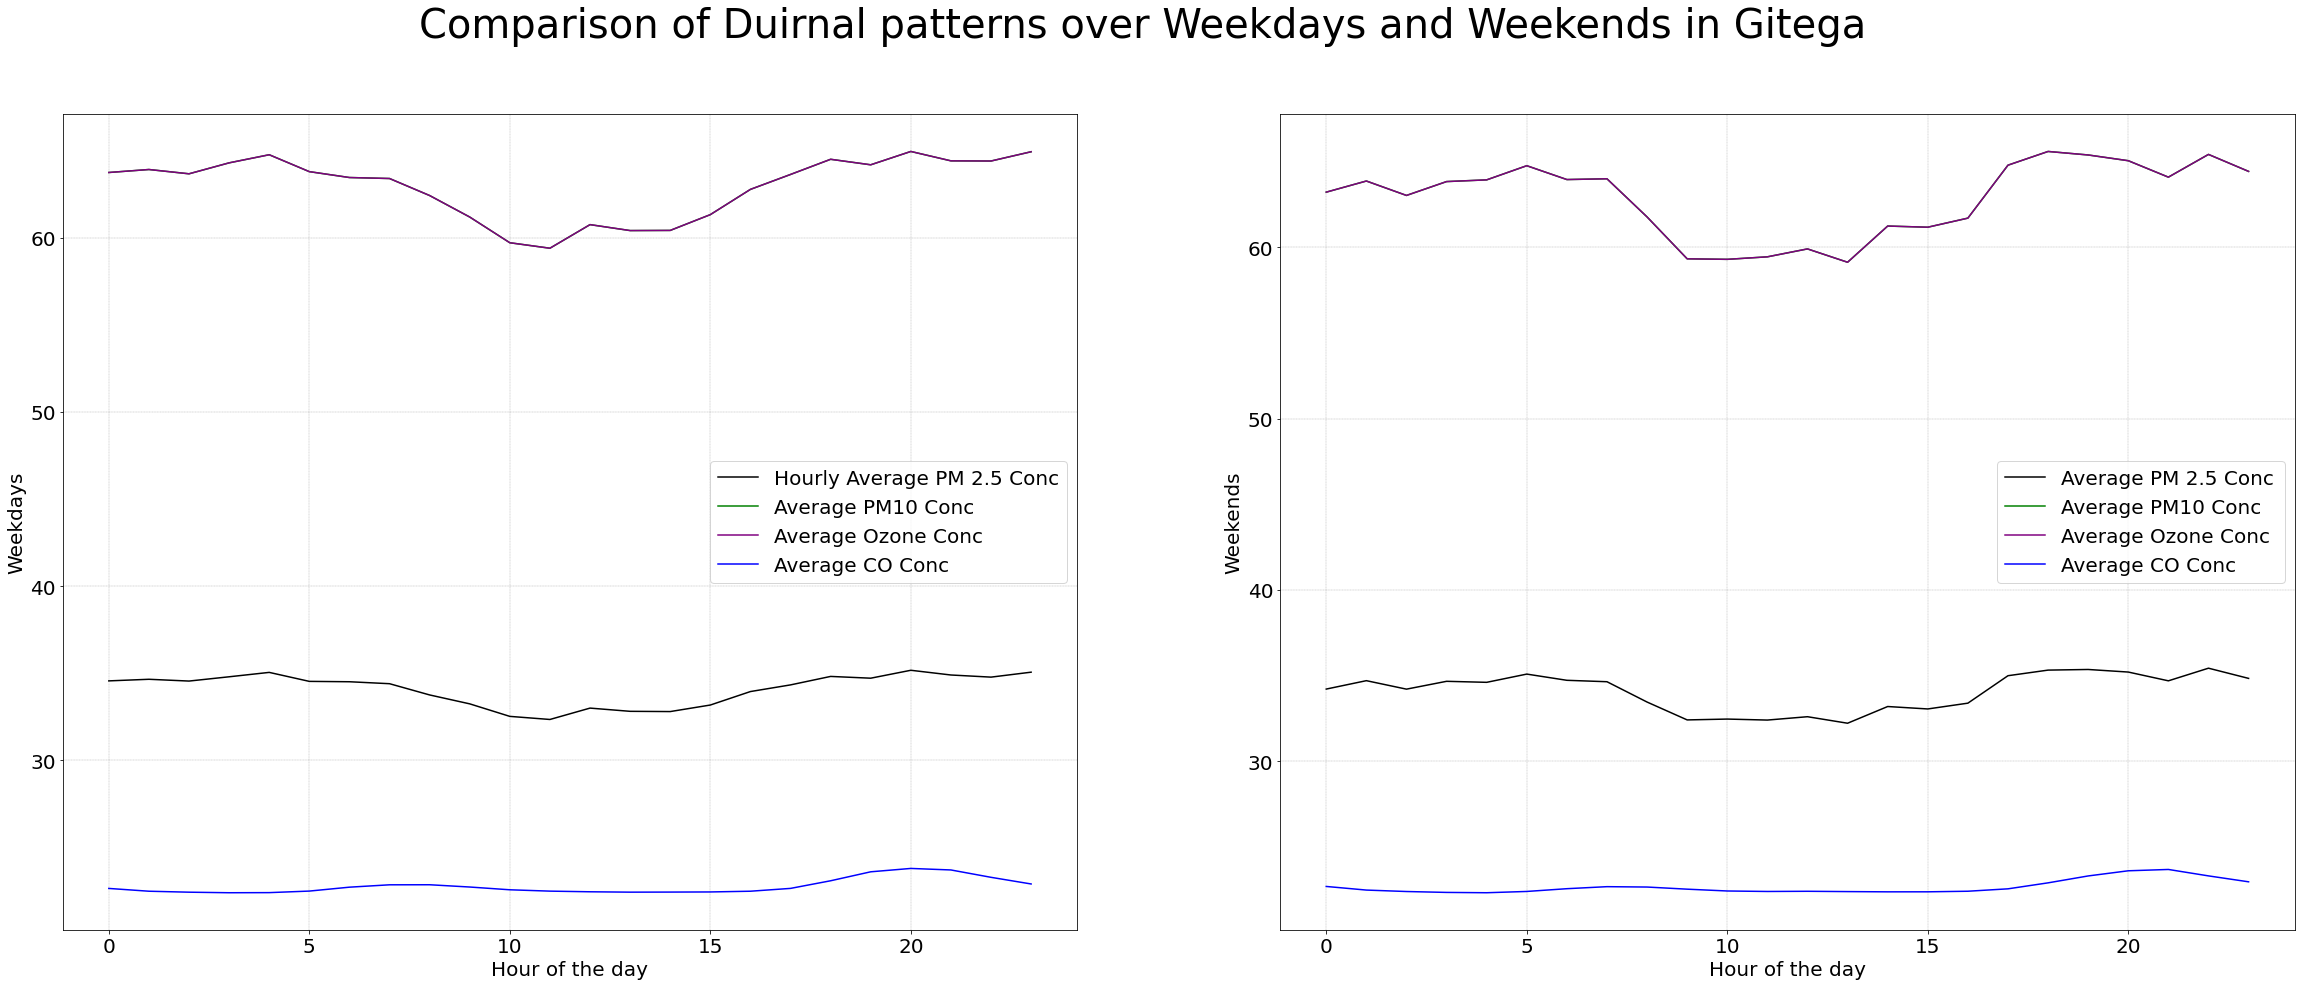

In [79]:
#Weekday,weekend comparison
# duirnal patterns per site
for i in LCS_data_extracted['site_name'].unique():
    weekdays_weekend(LCS_data_extracted,i)

In [80]:
# Function to plot daily over the entire year per site
def daily_conc (df,col1,col2,col3,col4,col5,site_name):
    #get the site 
    df1=site_df(df,site_name)
    #setting timestamp as the index
    df2=df1.set_index(col1).dropna()
    #resampling per hour
    df3=df2.resample('D')[col2,col3,col4,col5].mean()
    # Plotting a graph of hourly averages over the entire year
    # Plotting a graph of hourly averages over the entire year
    fig, (ax0,ax1,ax2,ax3) = plt.subplots(4, 1, sharex=True, constrained_layout=True,figsize=(25,15))
    #PM2.5
    ax0.plot(df3.index.values,
            df3[col2],
            color='black',
            label='PM 2.5 Concentration')   
    ax0.set(ylabel= f"Concentrations in ug/m3",
            title=f"Daily PM2.5 Concentrations in {site_name} over the entire year")
    ax0.legend(loc="upper right")
    ax0.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # PM10
    ax1.plot(df3.index.values,
            df3[col3],
            color='green',
            label='PM 10 Concentration')   
    ax1.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Daily PM10 Concentrations in {site_name} over the entire year")
    ax1.legend(loc="upper right")
    ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # Ozone
    ax2.plot(df3.index.values,
            df3[col4],
            color='purple',
            label='Ozone Concentration')   
    ax2.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Daily Ozone Concentrations in {site_name} over the entire year")
    ax2.legend(loc="upper right")
    ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    # CO
    ax3.plot(df3.index.values,
            df3[col5],
            color='blue',
            label='CO Concentration')   
    ax3.set(xlabel="Date",
            ylabel= f"Concentrations in ug/m3 ",
            title=f"Daily CO Concentrations in {site_name} over the entire year")
    ax3.legend(loc="upper right")
    ax3.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
    plt.show()   


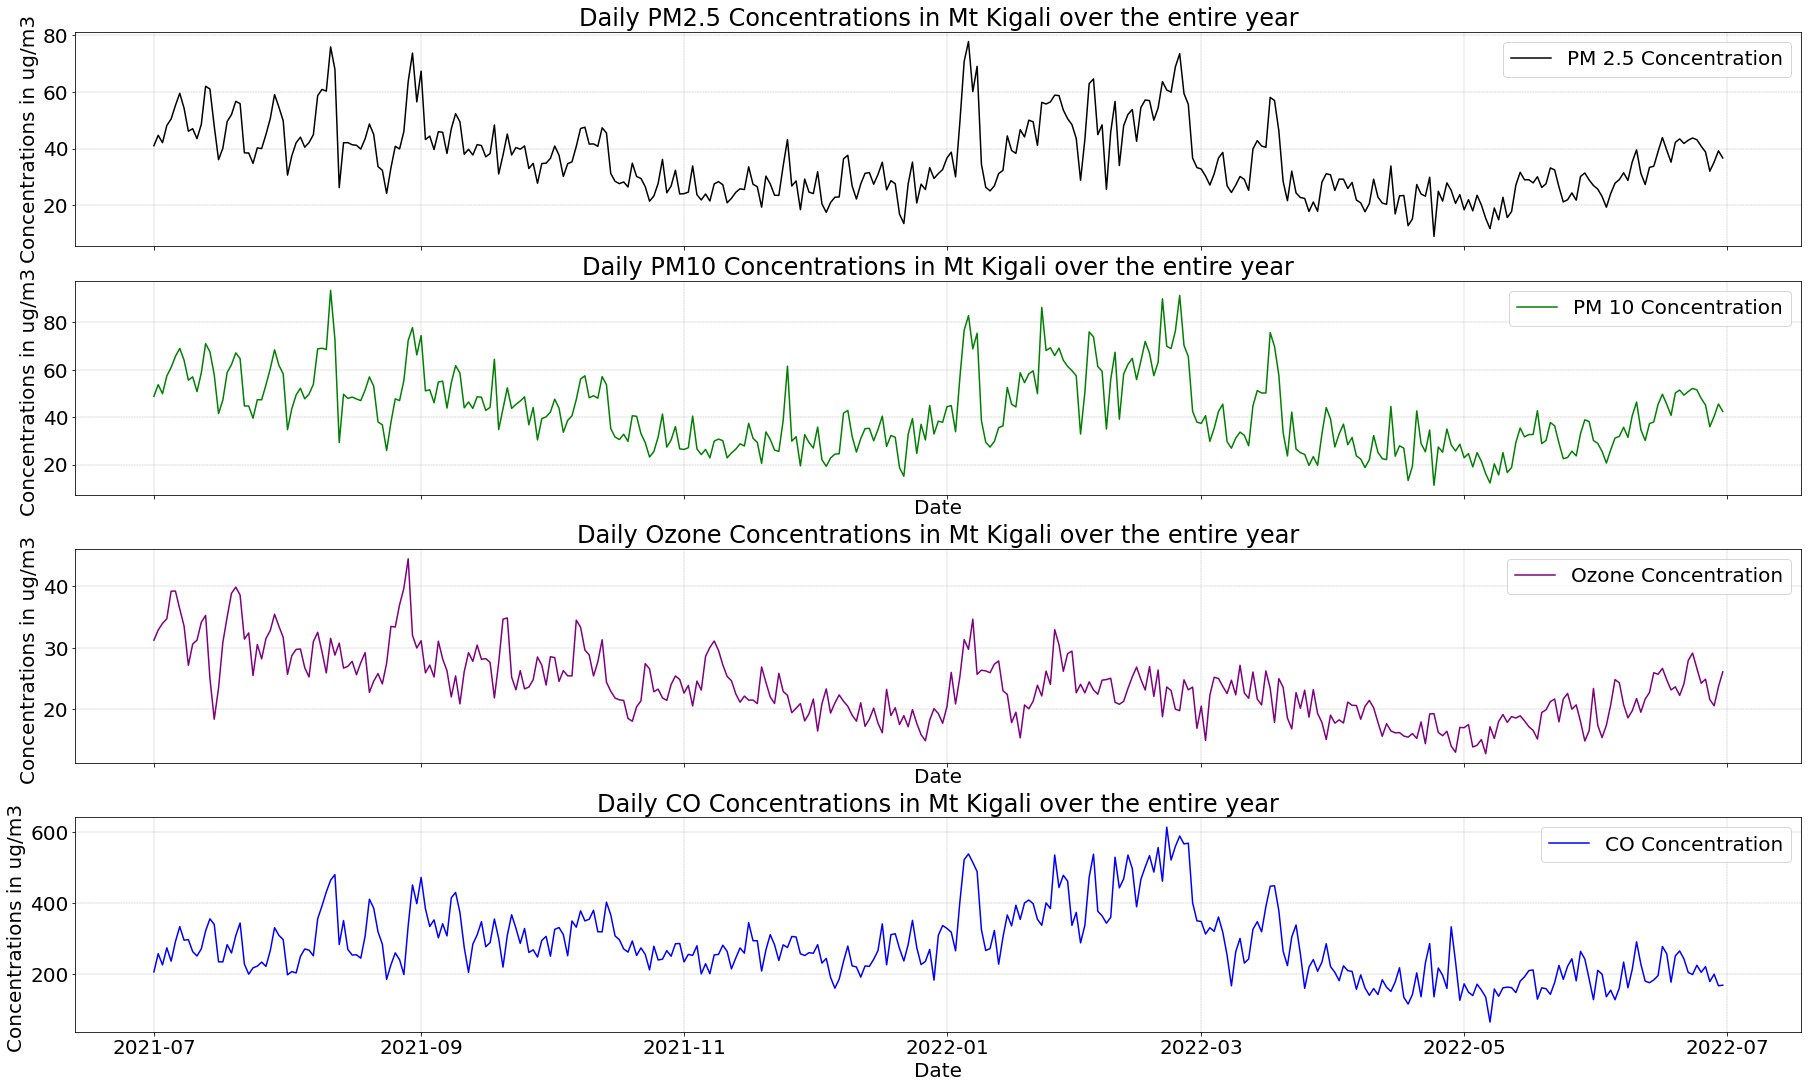

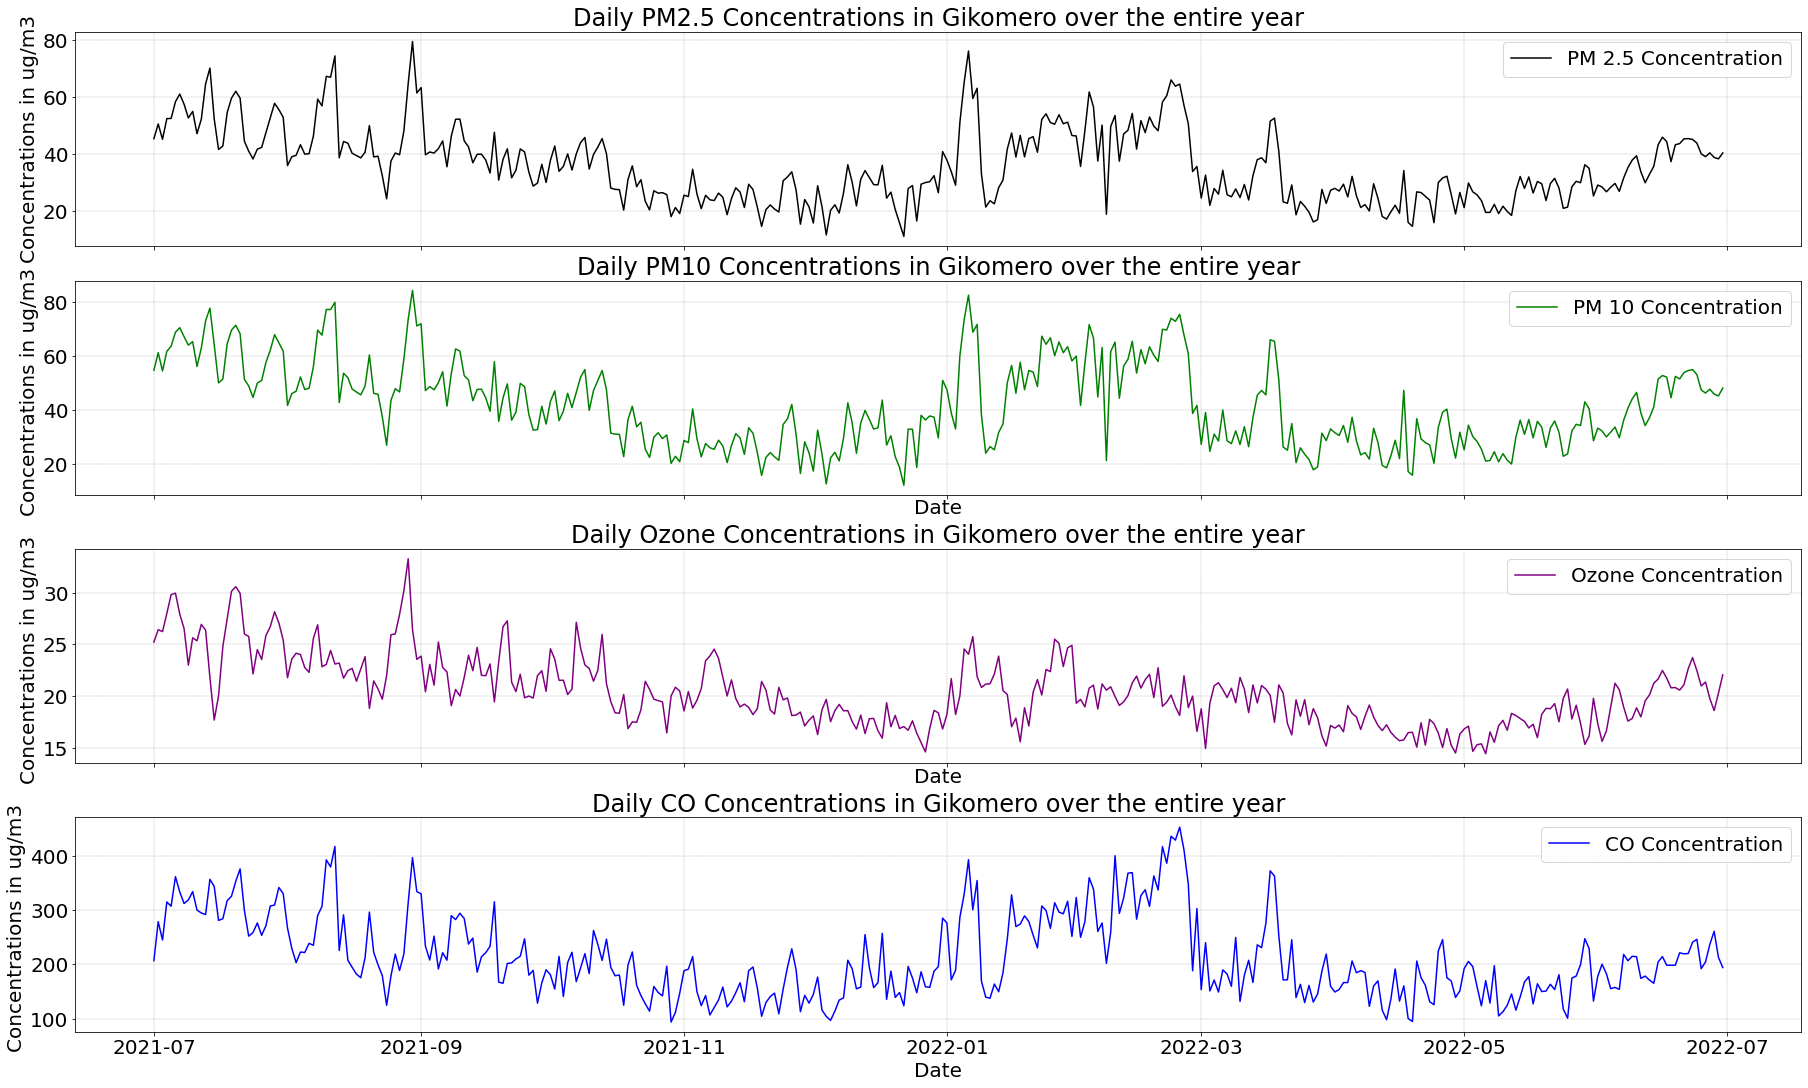

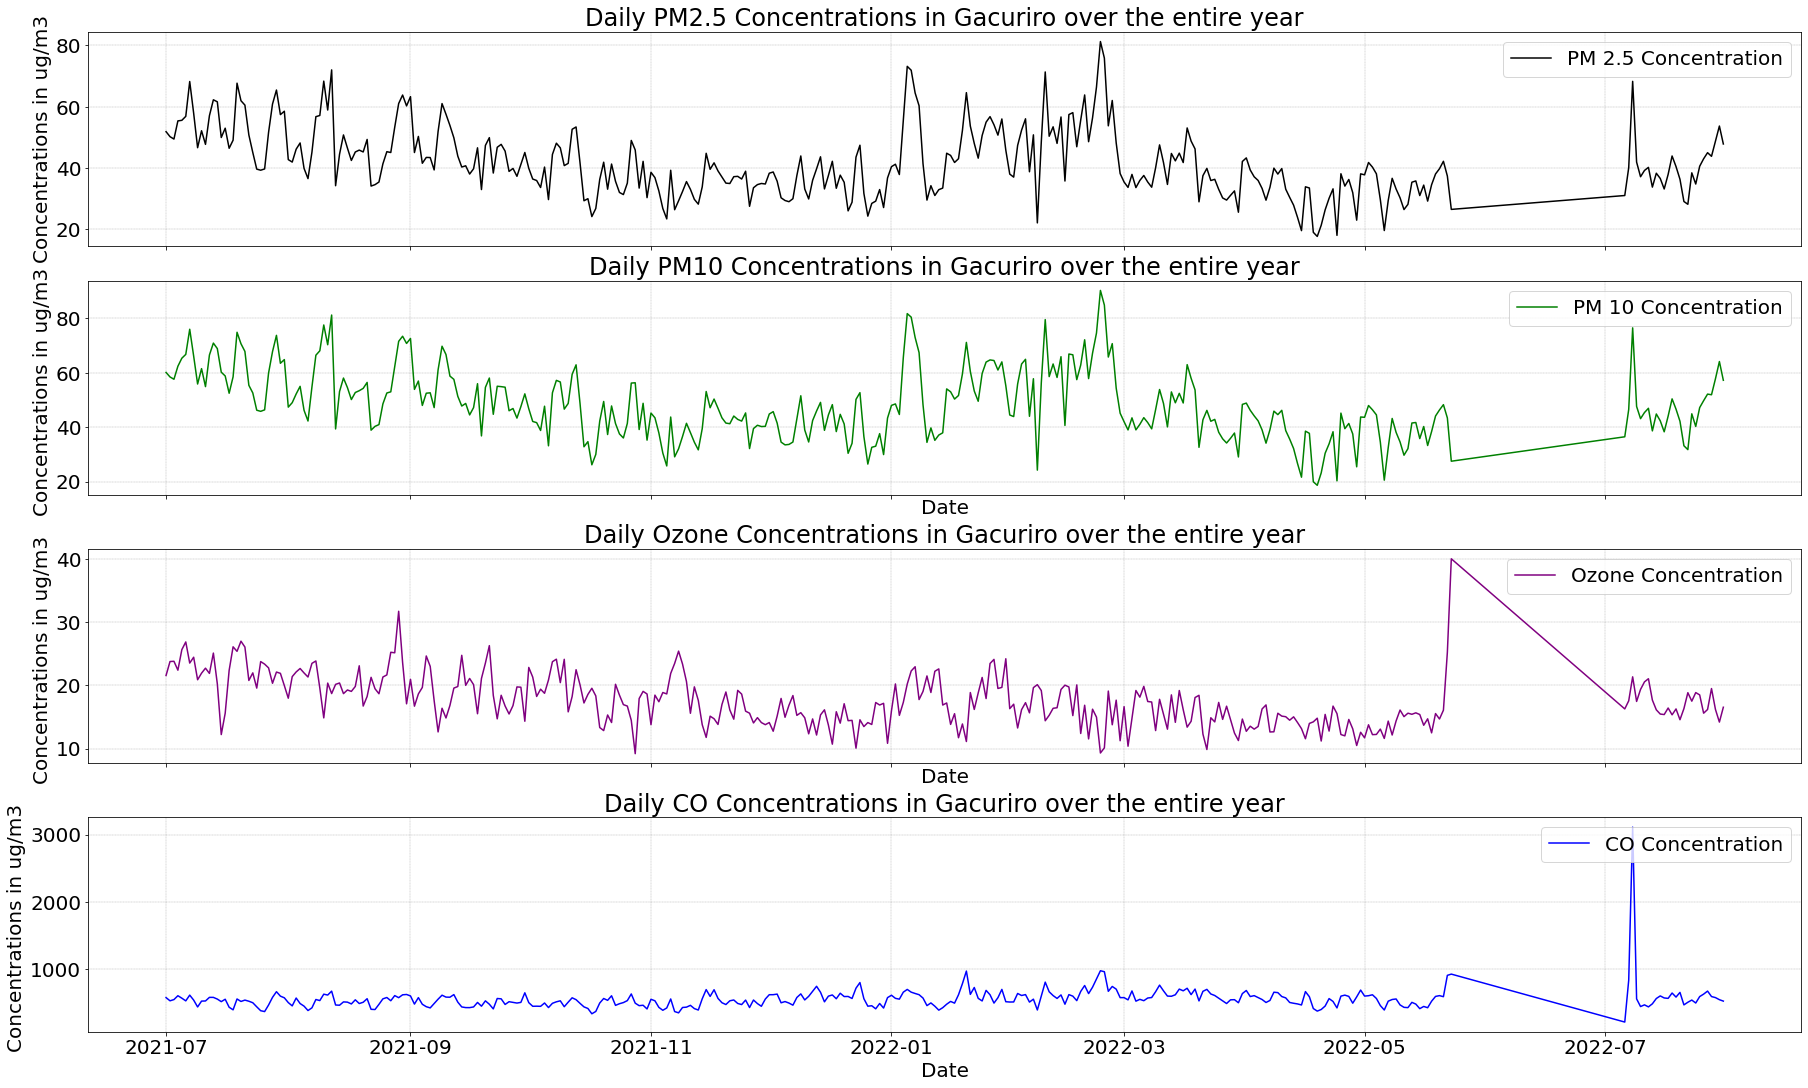

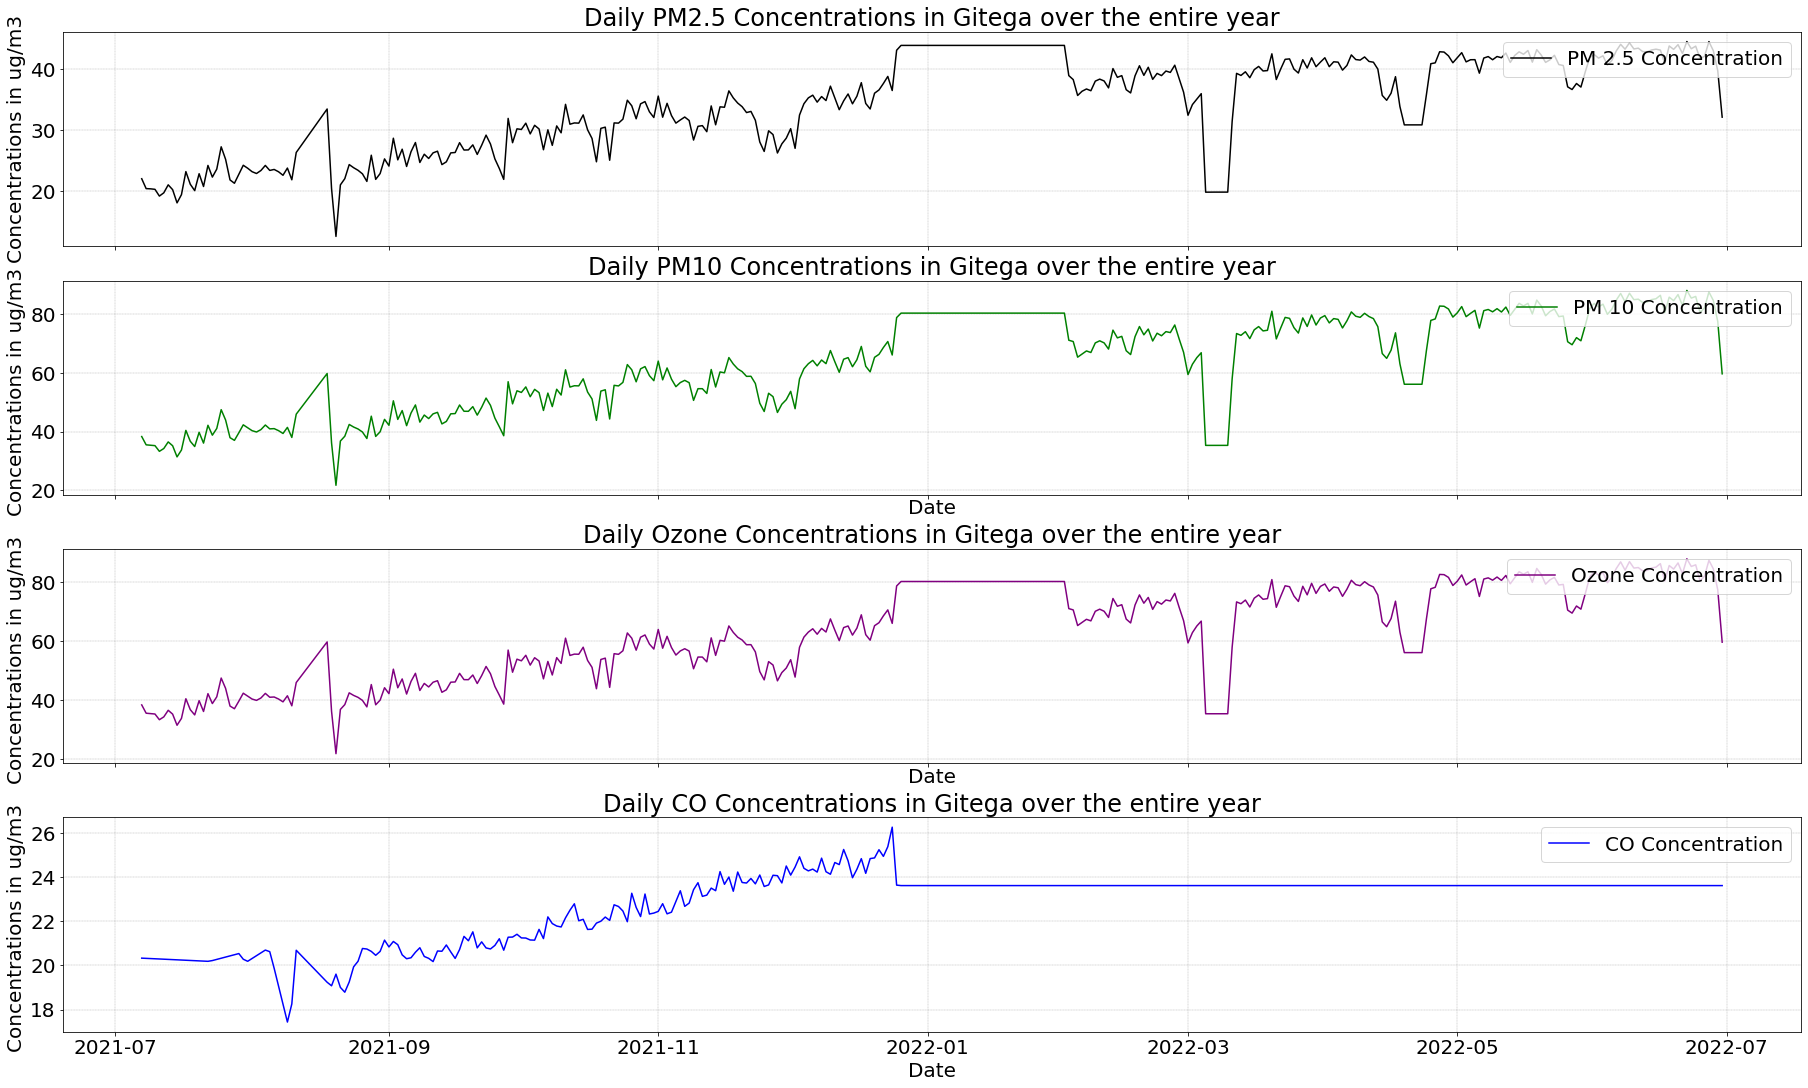

In [81]:
# daily averages per site
for i in LCS_data_extracted['site_name'].unique():
    daily_conc(LCS_data_extracted,"timestamp","PM25","PM10","O3","CO",i)